In [1091]:
import ee 
import shapely as shp
import pandas as pd
import numpy as np
import geopandas as gpd
import ast
from shapely.geometry import Polygon, MultiPolygon, Point
import rasterio
import geopandas as gpd
import sys
%load_ext autoreload
%autoreload 2
sys.path.insert(1, '/Users/gr_1/Documents/simplem/')
import simplem_par as simplem
import matplotlib.pyplot as plt
import os
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

from matplotlib.colors import ListedColormap
plt.rcParams.update({'font.size': 22})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [971]:
import inspect

In [972]:
os.path.abspath(inspect.getfile(simplem))

'/Users/gr_1/Documents/simplem/simplem_par.py'

In [1039]:
import numpy as np
## Figures
folder = 'results/r_mn05_6/'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
Gs = np.load('{}/Gs.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/ks.npy'.format(folder),allow_pickle=True)
careas = np.load('{}/careas.npy'.format(folder),allow_pickle=True)
slps2 =np.load('{}/slps2.npy'.format(folder),allow_pickle=True)

In [1076]:
a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octo_327_data')
loc = (a['eal_mmkyr']>-9999) & (~(a['ebe_mmkyr']>0))
a['ebe_mmkyr'][loc] = a['eal_mmkyr']

<ipython-input-1076-469952dd814f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['ebe_mmkyr'][loc] = a['eal_mmkyr']


In [1085]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
              
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs

In [1108]:
from sklearn import linear_model as lm
import sklearn
r2s = np.zeros(len(eros1[1]))
resid = np.zeros(len(eros1[1]))
pcoef = np.zeros(len(eros1[1]))
dratave = np.zeros(len(eros1[1]))

ks2 = ns.copy()#ks.copy()
diffus2 = diffus.copy()

badn = []
badd = []
for i in range(len(eros1[1])):#range(len(ms)):
        if dfs[i] is None:
            continue
        
        y = np.log(np.float64(a['ebe_mmkyr'])/1000)
        x = np.log(dfs[i][:len(a)])

        #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
        #x=x[I_min]
        #y=y[I_min]
        xi = x.copy()
        I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
        x=np.delete(x,I)
        y=np.delete(y,I)
        I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
        x = np.delete(x,I2)
        y = np.delete(y,I2)
        l1  = lm.LinearRegression(fit_intercept=False)
        l = lm.LinearRegression()
        if len(x[np.logical_not(np.isnan(x))])>500:
                #print(len(x[np.logical_not(np.isnan(x))]))
#                 if 1:
#                     x = x[ y > -5 ]

#                     y = y[ y > -5 ]
                print(len(x))
                p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                p = l.fit(x.reshape(-1,1), y.reshape(-1,1 ))
            
                intercept = np.mean( y - x )
  
            ####
                y2 = x+intercept
                #y2 = p.predict(x.reshape(-1,1))
                y3 = np.exp(x) * np.exp(intercept)#p1.coef_#p1.predict(np.exp(x.reshape(-1,1)))
                #try:
                r2s[i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)
               # r2s[i] = sklearn.metrics.precision_score(y.reshape(-1,1),y2)
                #except:
                #print('here')
                diffus2[i] *= p1.coef_
                ks2[i] *= p1.coef_
                resid[i] = sklearn.metrics.mean_absolute_error(np.exp(y.reshape(-1,1)),np.exp(y2))
                #r2s = 1-resid
                print(len(y[np.logical_not(np.isnan(x))]))
                pcoef[i] = intercept
                drat[i][np.isinf(drat[i])] = 0
                dratave[i] = np.mean(drat[i][drat[i]>0])
               # if resid[i]>127.9:
                #    break
        else:
            print('lj1i2eoifwje')
a['maxr2'] = dfs[np.argmax(r2s)][:len(a)] * np.exp(pcoef[np.argmax(r2s)])

3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193
3193


<ipython-input-1108-b86bf96e13fa>:17: RuntimeWarning: invalid value encountered in log
  y = np.log(np.float64(a['ebe_mmkyr'])/1000)
<ipython-input-1108-b86bf96e13fa>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-1108-b86bf96e13fa>:17: RuntimeWarning: invalid value encountered in log
  y = np.log(np.float64(a['ebe_mmkyr'])/1000)
<ipython-input-1108-b86bf96e13fa>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty sl

Text(0, 0.5, 'r²')

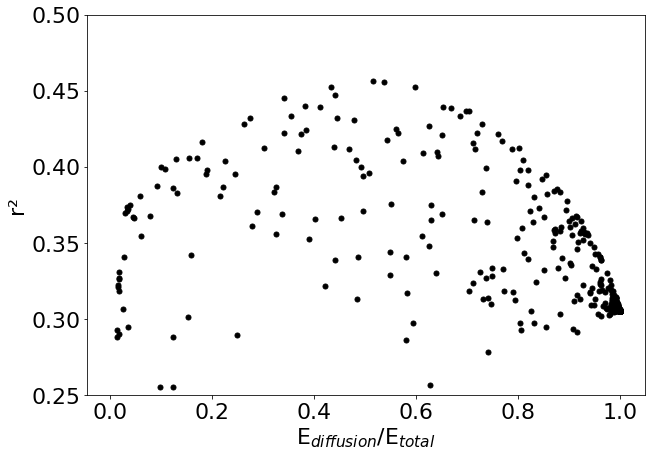

In [1124]:

fig,ax = plt.subplots(figsize=(10,7))
plt.plot(dratave,r2s,'.k',markersize=10)

#plt.xscale('log')
#plt.xlim([0, 1])
#
plt.ylim([.25, .5])
plt.xlabel('n')
plt.xlabel('E' + '$_{diffusion}$'.translate(subscript) + '/' + 'E' + '$_{total}$'.translate(subscript) )
#plt.xlabel('Critical area (km' +'2'.translate(superscript)+')')
plt.ylabel('r'+'2'.translate(superscript))
#plt.ylabel('log(D/k)')
#plt.xlim(([0, 2.5]))


In [1095]:
(dratave)[np.argmax(r2s)]

1.5409920768474474e-07

5.800966333320803

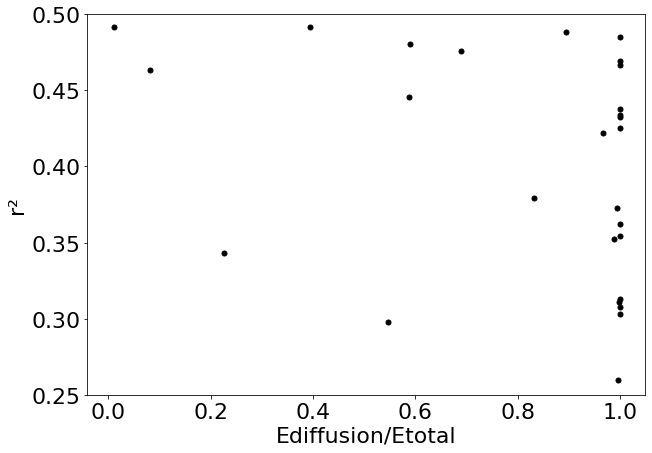

In [908]:
log = np.log10
fig,ax = plt.subplots(figsize=(10,7))
plt.plot(dratave,r2s,'.k',markersize=10)
#plt.xscale('log')
plt.xlabel('Ediffusion/Etotal')
#plt.xlim([1,10**8])
plt.ylabel('r'+ '2'.translate(superscript))
plt.ylim([.25,.5])
diffus[np.argmin(r2s)]/ks[np.argmin(r2s)]

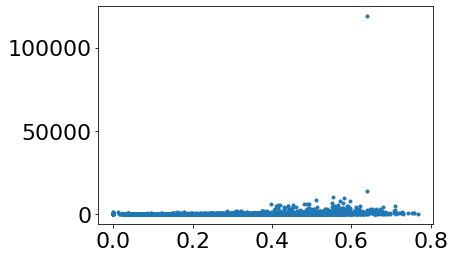

In [1003]:
plt.plot(slps2[:3553],a['ebe_mmkyr'],'.')


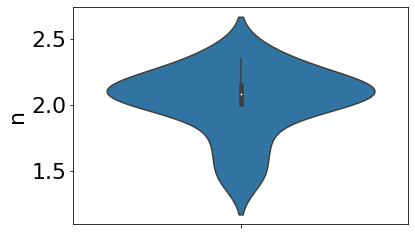

In [1049]:
b1 = pd.DataFrame()
b1['r' +'2'.translate(superscript)] = r2s
b1['log(D/k)'] = np.log10(diffus/ks) 
b1['n'] = ns
b1['Diffusion/total'] = dratave
b1['top'] = pd.qcut(b1['r²'],[.98,1])
b2 = b1[~b1['top'].isna()]
sns.violinplot(data=b2,y='n')

b1 = pd.DataFrame()
b1['r' +'2'.translate(superscript)] = r2s
b1['log(D/k)'] = np.log10(diffus/ks) 
b1['n'] = ns
b1['Diffusion/total'] = dratave
b1['top'] = pd.qcut(b1['r²'],[.95,1])

Text(0.5, 0, 'D/k ratio')

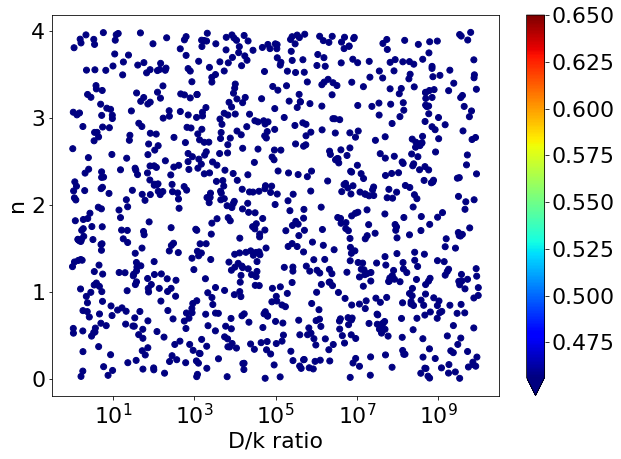

In [1052]:
fig,ax = plt.subplots(figsize=(10,7))
ax = plt.scatter(careas,ns,c=r2s,cmap='jet',vmax = .3)
plt.xscale('log')
plt.colorbar(ax,extend='min')
plt.ylabel('n')
plt.xlabel('D/k ratio')


Text(0.5, 0, 'D/k ratio')

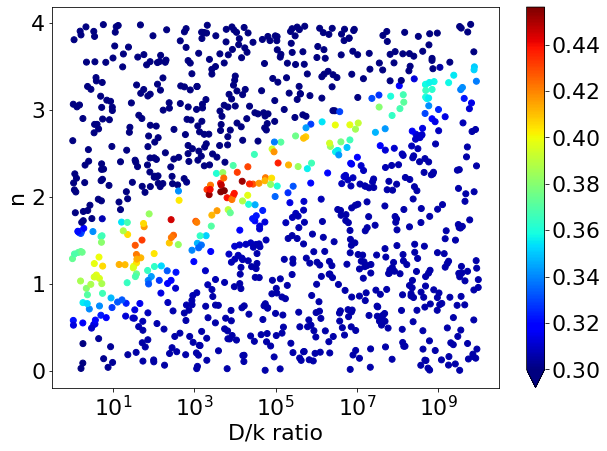

In [1054]:
fig,ax = plt.subplots(figsize=(10,7))
ax = plt.scatter(diffus/ks,ns,c=r2s,cmap='jet',vmin=.3)
plt.xscale('log')
plt.colorbar(ax,extend='min')
plt.ylabel('n')
plt.xlabel('D/k ratio')


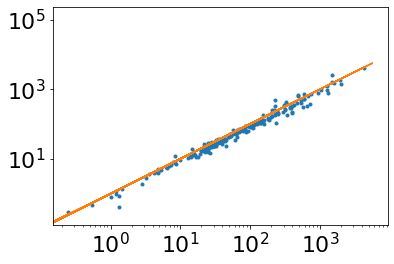

In [1037]:
plt.plot(a['eal_mmkyr'],a['ebe_mmkyr'],'.')
plt.xscale('log')
plt.yscale('log')
plt.plot(a['eal_mmkyr'], a['eal_mmkyr'])

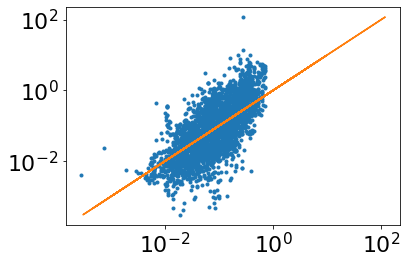

In [850]:
plt.plot(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]),a['ebe_mmkyr']/1000,'.')
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000)
plt.xscale('log')
plt.yscale('log')

(0.001, 1)

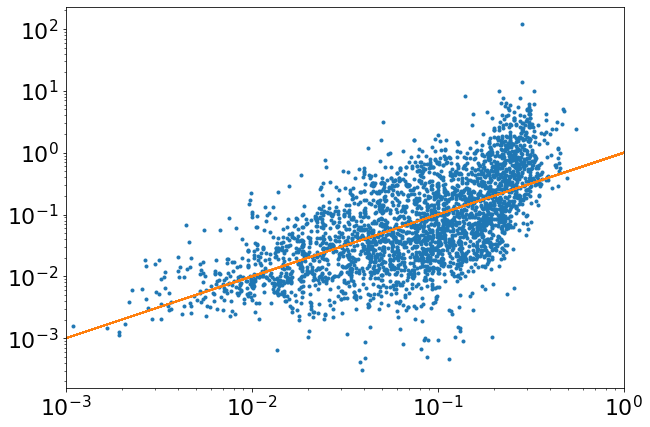

In [779]:
fig,ax = plt.subplots(figsize=(10,7))

plt.plot(dfs[10][:len(a)]*np.exp(pcoef[10]),a['ebe_mmkyr']/1000,'.')
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000)
plt.xscale('log')
plt.yscale('log')
plt.xlim([10**-3, 1])
plt.xlabel('(m/Myr)')

plt.ylabel('10'.translate(superscript) + 'Be erosion rate(m/Myr)')

IndexError: index -998 is out of bounds for axis 0 with size 40

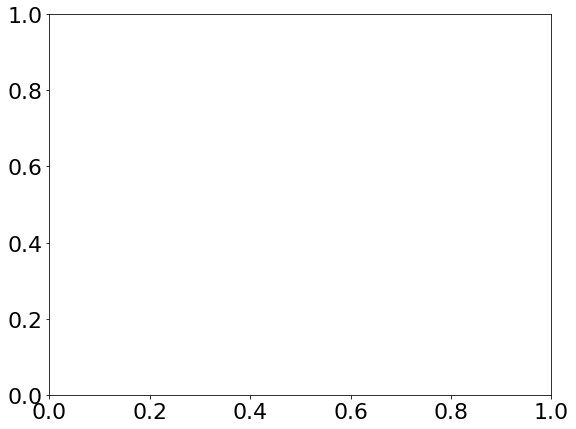

In [777]:
plt.subplots(figsize=(9,7))
n1 = 998# Xth worst estimate
plt.plot(dfs[np.argsort(r2s)[-n1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-n1]]),a['ebe_mmkyr']/1000,'.')
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000)
plt.text(1,.001, 'r' + '2'.translate(superscript) + ' = ' + str(r2s[np.argsort(r2s)[-n1]])[:5])
plt.xscale('log')
plt.yscale('log')
print(ns[np.argsort(r2s)[-n1]])
diffus[np.argsort(r2s)[-n1]]/ks[np.argsort(r2s)[-n1]]

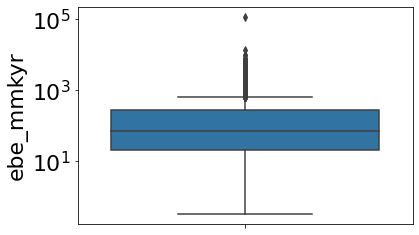

In [688]:
sns.boxplot(data=a,y ='ebe_mmkyr')
a['log(ebe_mmkyr)'] = np.log10(a['ebe_mmkyr'])
plt.yscale('log')

In [228]:
diffus[np.argmax(r2s)]/ks[np.argmax(r2s)]

1804.5545601198119

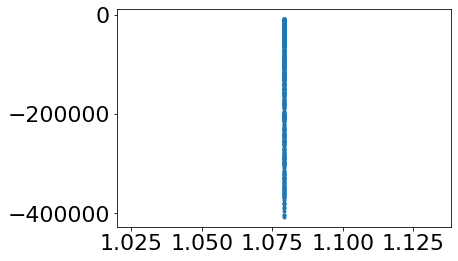

In [497]:
plt.plot(np.log10(careas),resid,'.')
#plt.ylim([.2, .5])

(array([41., 31., 33., 26., 20., 35., 21., 15., 24., 22.]),
 array([0.01062576, 1.00164145, 1.99265713, 2.98367281, 3.97468849,
        4.96570417, 5.95671985, 6.94773553, 7.93875122, 8.9297669 ,
        9.92078258]),
 <BarContainer object of 10 artists>)

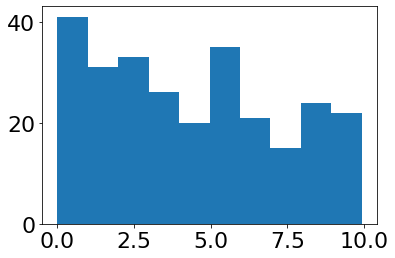

In [226]:
l = np.log10(diffus/ks)
plt.hist(l[r2s>.3])
#plt.plot(np.log10(diffus/ks),r2s,'.')
#plt.ylim([.2, .5])

NameError: name 'areas' is not defined

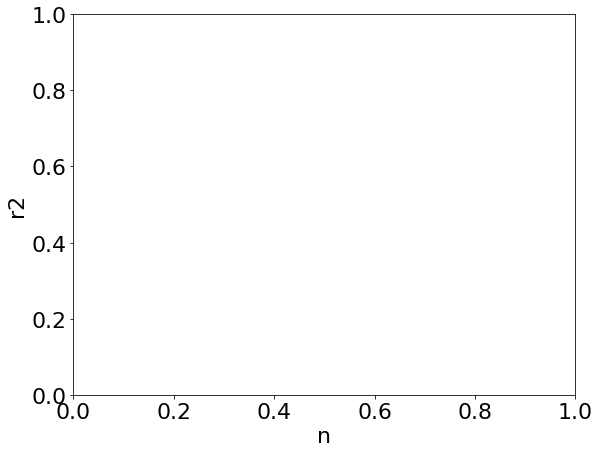

In [496]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.xlabel('n')
plt.ylabel('r2')
plt.scatter(ns,r2s,10,c=a[areas])
plt.ylim([0,.5])
#plt.xscale('log')
#plt.yscale('log')


In [825]:
ns[np.argmax(r2s)]

2.060090188998529

IndexError: index 3120 is out of bounds for axis 0 with size 1000

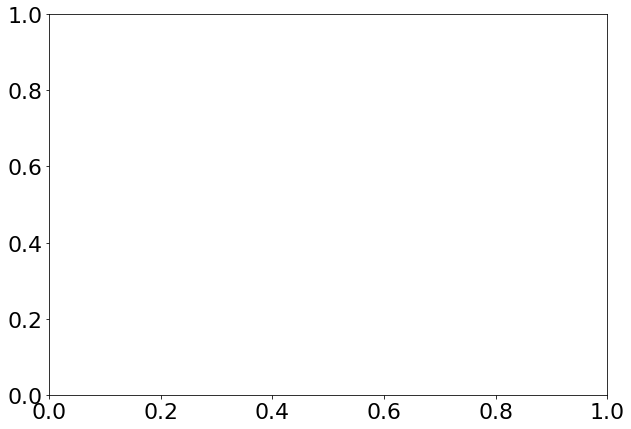

In [936]:
fig, ax = plt.subplots(figsize = (10,7))
io =np.argmax(r2s)
plt.scatter(dfs[io][:len(a)]*np.exp(pcoef[io]),a['ebe_mmkyr']/1000,s=20)
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000,'k')
plt.xlim([10**-3.1,10**.52])
plt.ylim([10**-3.8,10**1.5])
plt.xlabel('Modeled erosion rate (m/kyr)')
plt.ylabel('{}Be apparent erosion rate (m/kyr)'.format('10'.translate(superscript)))
plt.xscale('log')
plt.yscale('log')
#plt.colorbar()

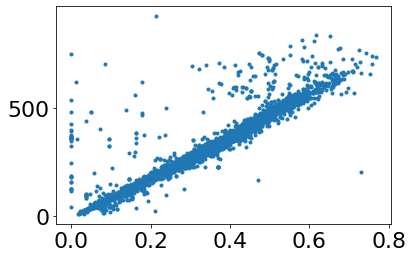

In [966]:
plt.plot(slps2[:3553], a['slp_ave'], '.')

0.3754858997461511


<ipython-input-969-cd3f11f3a7fe>:6: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


Text(0, 0.5, '¹⁰Be apparent erosion rate (m/kyr)')

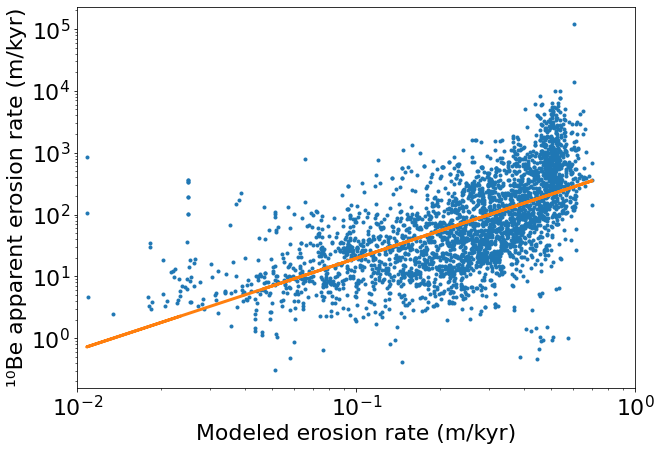

In [969]:
fig, ax = plt.subplots(figsize = (10,7))
io =np.argmax(r2s)
#plt.scatter(dfs[io][:len(a)]*np.exp(pcoef[io]),a['ebe_mmkyr']/1000,s=20)
r = lm.LinearRegression()
x = np.array(slps2[:3553])
x = np.log10(x)
y = a['ebe_mmkyr'].to_numpy()
y = np.log10(y)
isn = np.logical_and(np.logical_not(np.isnan(x)), np.logical_not(np.isnan(y)))
isi = np.logical_and(np.logical_not(np.isinf(x)), np.logical_not(np.isinf(y)))
isni = np.logical_and(isn,isi)
x = x[isni]

y = y[isni]
r= r.fit(x.reshape(-1,1),y)
y2 = r.predict(x.reshape(-1,1))
print(sklearn.metrics.r2_score(y.reshape(-1,1),y2.reshape(-1,1)))
plt.plot(10**x,10**y,'.')
plt.xlim([10**-2,10**0])
plt.plot(10**x,10**y2,linewidth=3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Modeled erosion rate (m/kyr)')
plt.ylabel('{}Be apparent erosion rate (m/kyr)'.format('10'.translate(superscript)))

#plt.colorbar()

Text(0, 0.5, 'Slope Octopus')

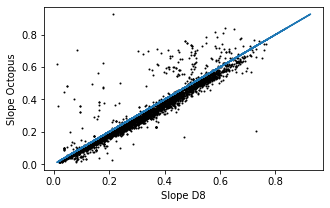

In [44]:
fig, ax = plt.subplots(figsize = (5,3))
slpsall = np.load('slpsall.npy')
plt.scatter(slps2[:3553][slps2[:3553]>0],a['slp_ave'][slps2[:3553]>0]/1000,c='k', s=1)
plt.plot(a['slp_ave']/1000,a['slp_ave']/1000)
plt.xlabel('Slope D8')
plt.ylabel('Slope Octopus')

#plt.xscale('log')
#plt.yscale('log')


In [56]:
len(np.where(np.abs(slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000)>.2)[0]) 

50

In [138]:
#slps1 = gpd.read_file('basins_aspect_means_0 (2).csv')
#slps1 = pd.to_numeric(slps1['slp_ave'],errors='coerce')

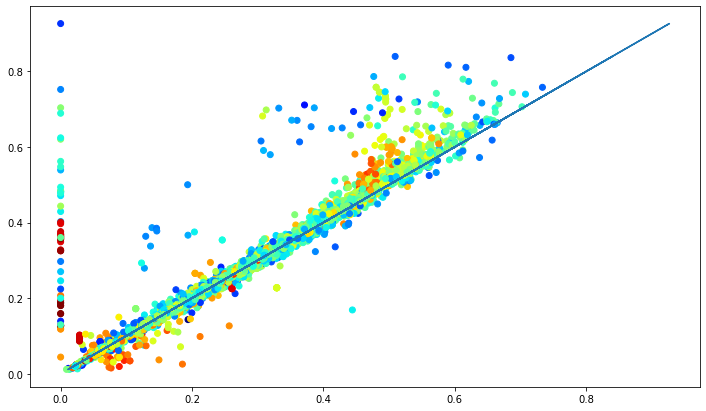

In [218]:
fig, ax = plt.subplots(figsize = (12,7))
slpsall = np.load('slpsall.npy')
plt.scatter(slps2[:3553], a['slp_ave']/1000,c=np.log10(a['area']),cmap='jet')
plt.plot(a['slp_ave']/1000,a['slp_ave']/1000)
#plt.xscale('log')
#plt.yscale('log')


In [225]:
np.argmax((slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000))

2145

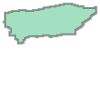

In [238]:
a.geometry[2145]

212

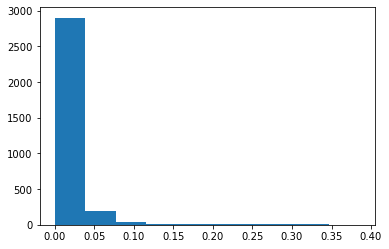

In [169]:
plt.hist((np.abs(slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000)))
len(np.where(np.abs(slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000) > .05)[0])

<ipython-input-177-7581de6ca083>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.scatter(slps2[:3553], a['ebe_mmkyr']/1000,c=(a.centroid.y),vmin=-50,vmax=50,cmap='jet')


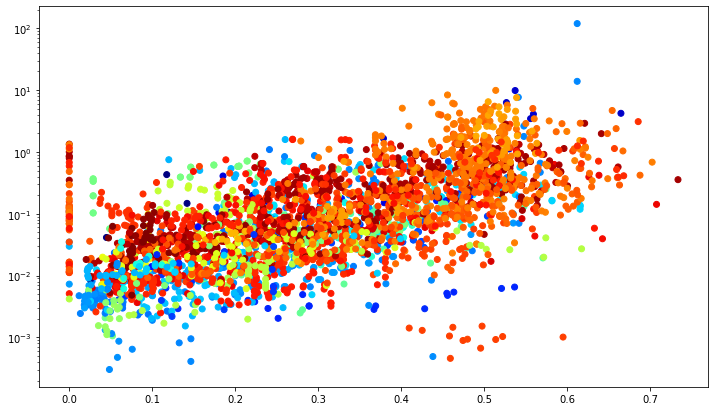

In [177]:
fig, ax = plt.subplots(figsize = (12,7))
slpsall = np.load('slpsall.npy')
plt.scatter(slps2[:3553], a['ebe_mmkyr']/1000,c=(a.centroid.y),vmin=-50,vmax=50,cmap='jet')
plt.yscale('log')

<ipython-input-193-a1e92631e24c>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.plot(a.area[slps2[:3553] == 0][a.area>0], '.')


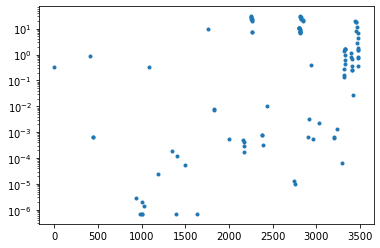

In [193]:
plt.yscale('log')

<ipython-input-195-77bdca639977>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.plot(a.area[a['area']>0], '.')
<ipython-input-195-77bdca639977>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.plot(a.area[slps2[:3553] == 0][a.area>0], 'r.')


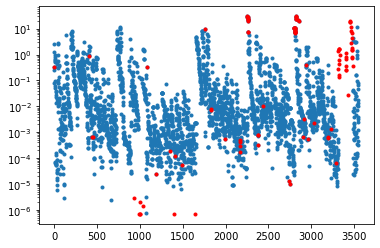

In [195]:
plt.plot(a.area[a['area']>0], '.')
plt.plot(a.area[slps2[:3553] == 0][a.area>0], 'r.')

plt.yscale('log')

In [189]:
np.mean(a['area'][a['area']>0])

3705.5099137177367

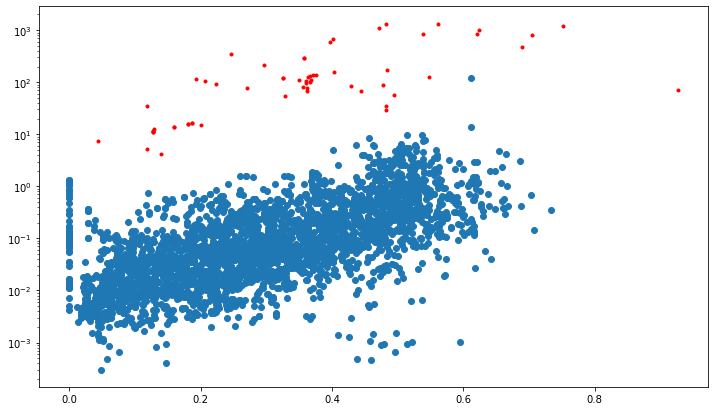

In [183]:
fig, ax = plt.subplots(figsize = (12,7))
slpsall = np.load('slpsall.npy')
plt.scatter(slps2[:3553], a['ebe_mmkyr']/1000)#,c=(a.centroid.y))
#plt.scatter(a['slp_ave']/1000, a['ebe_mmkyr']/1000,c=(a.centroid.y),vmin=-50,vmax=50,cmap='jet')

#plt.plot(a['slp_ave']/1000,a['slp_ave']/1000)
#plt.xscale('log')
plt.yscale('log')
plt.plot(a['slp_ave'][slps2[:3553]==0]/1000, a['ebe_mmkyr'][slps2[:3553]==0], 'r.')

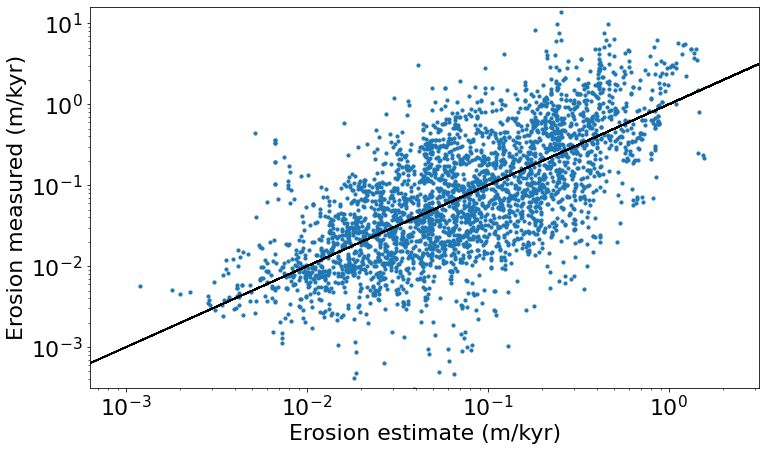

In [107]:
fig, ax = plt.subplots(figsize = (12,7))
r2s = -resid
plt.scatter(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]),a['ebe_mmkyr']/1000,s=10)
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000,'k')
plt.xlim([10**-3.2,10**.5])
plt.ylim([10**-3.5,10**1.2])
plt.xlabel('Erosion estimate (m/kyr)')
plt.ylabel('Erosion measured (m/kyr)')
plt.xscale('log')
plt.yscale('log')
#c = plt.colorbar()
#c.set_label('log(Drainage area (km)' + '2'.translate(superscript) + ')')

In [92]:
from scipy.stats import bartlett

(0.0, 5.0)

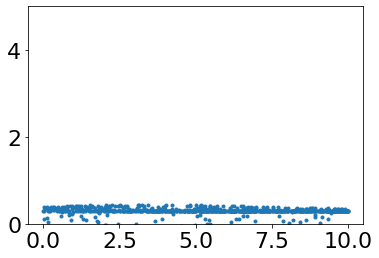

In [241]:
plt.plot(np.log10(diffus/ks),r2s,'.')
plt.ylim([0,5])

<ipython-input-106-a2047c141dde>:4: RuntimeWarning: divide by zero encountered in log10
  a['resid'] = -np.log10(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]))+np.log10(a['ebe_mmkyr']/1000)
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
<ipython-input-106-a2047c141dde>:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 10**6])


(0.013385378085027523, 1000000)

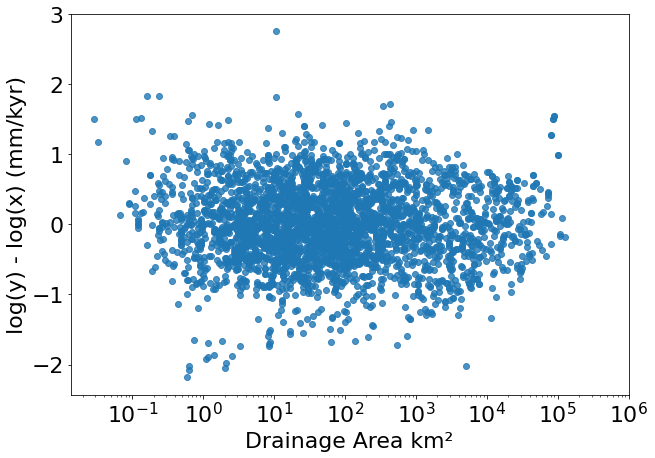

In [106]:
import seaborn as sns
plt.subplots(figsize = (10,7))
a['resid'] = 1
a['resid'] = -np.log10(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]))+np.log10(a['ebe_mmkyr']/1000)
loc = a.index[np.isinf(a['resid'])]
#a['bio12'][loc] = 0
sns.regplot(data=a,x='area',y='resid',fit_reg=True,scatter=True)
plt.xscale('log')
plt.xlabel('Drainage Area ' + 'km' +'2'.translate(superscript))
plt.ylabel('log(y) - log(x) (mm/kyr)')
plt.xlim([0, 10**6])


In [149]:
a2 = a.loc[~a['resid'].isna()]
a2 = a2.loc[~a2['area'].isna()]
a2 = a2.loc[~(a2['resid']>1e20)]
a2 = a2.loc[~(a2['area']>1e20)]
a2 = a2.loc[~(a2['resid']<-1e20)]
a2 = a2.loc[~(a2['area']<-1e20)]

In [151]:
p1 = a2['resid'][a2['area']>10**3].to_numpy()
p2 = a2['resid'][a2['area']<=10**3].to_numpy()

bartlett(p1,p2)

BartlettResult(statistic=4.28507663992576, pvalue=0.038448349142781967)

In [1481]:
fig,ax = plt.subplots(figsize=(10,7))
ax = plt.scatter(diffus/ks,ns,c=r2s,cmap='jet',vmin=.3)
plt.xscale('log')
plt.colorbar(ax,extend='min')
plt.ylabel('n')
plt.xlabel('D/k ratio')

array([   0,   37,  113,  114,  408,  447,  449,  467, 1071, 1072, 1089,
       1184, 1349, 1391, 1407, 1474, 1494, 1671, 1765, 1832, 1833, 1999,
       2166, 2169, 2172, 2174, 2255, 2256, 2257, 2258, 2259, 2260, 2261,
       2262, 2263, 2381, 2382, 2385, 2433, 2746, 2751, 2803, 2804, 2805,
       2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2818, 2819,
       2820, 2821, 2822, 2851, 2852, 2905, 2912, 2939, 2967, 3028, 3199,
       3200, 3236, 3291])

In [ ]:
plt.scatter(np.log10(a['area']),np.log10(dfs[np.argmax(r2s)][:len(a)]*np.exp(pcoef[np.argmax(r2s)]))-np.log10(a['ebe_mmkyr']/1000),s=30)
plt.subplots(figsize=(5,5))
plt.scatter(np.log10(a['slp_ave']),np.log10(dfs[np.argmax(r2s)][:len(a)]*np.exp(pcoef[np.argmax(r2s)]))-np.log10(a['ebe_mmkyr']/1000),s=30)
plt.figure()
plt.scatter(np.log10(a['ebe_mmkyr']),np.log10(dfs[np.argmax(r2s)][:len(a)]*np.exp(pcoef[np.argmax(r2s)]))-np.log10(a['ebe_mmkyr']/1000),s=30)


In [7]:
import numpy as np
## Figures
folder = 'results/var_concavity_1//'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/eros.npy'.format(folder),allow_pickle=True)

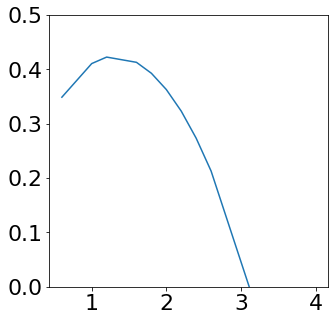

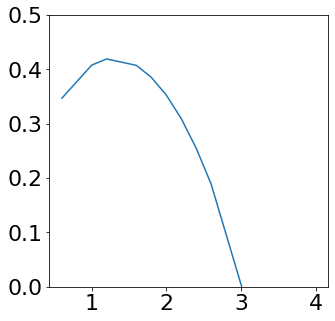

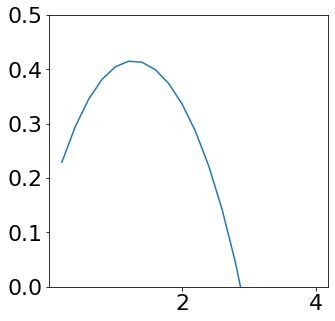

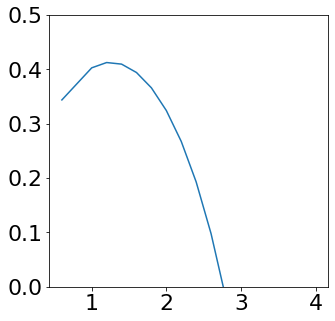

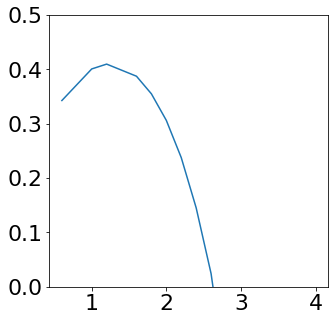

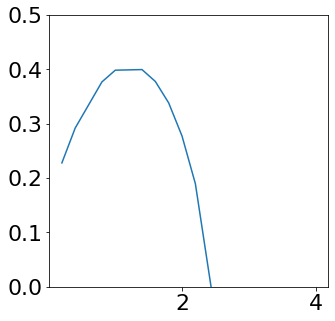

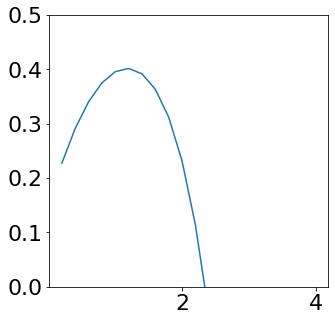

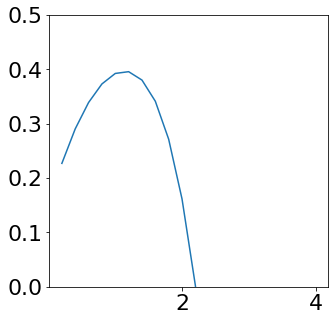

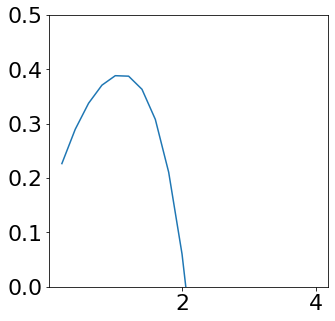

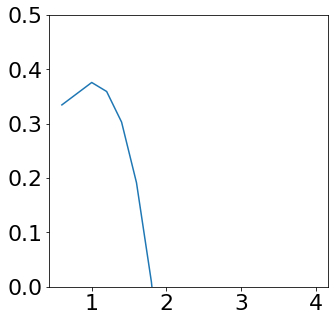

In [508]:
ss = np.unique(np.round(ms/ns,2))
o = np.zeros(len(ss))
for c,s in enumerate(ss):
    fig,ax = plt.subplots(figsize=(5,5))
    I = np.where(ms/ns==s)[0]
    plt.plot(ns[I],r2s[I])
    plt.ylim([0, .5])
    o[c] = np.max(r2s[I])
    c+=1


## Compare w/ bio data

In [917]:
# maybe ... 
a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octo_327_data')
#a.index = range(len(a))
#a = a[(a['ebe_mmkyr']>0)]

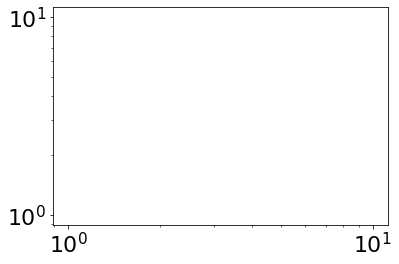

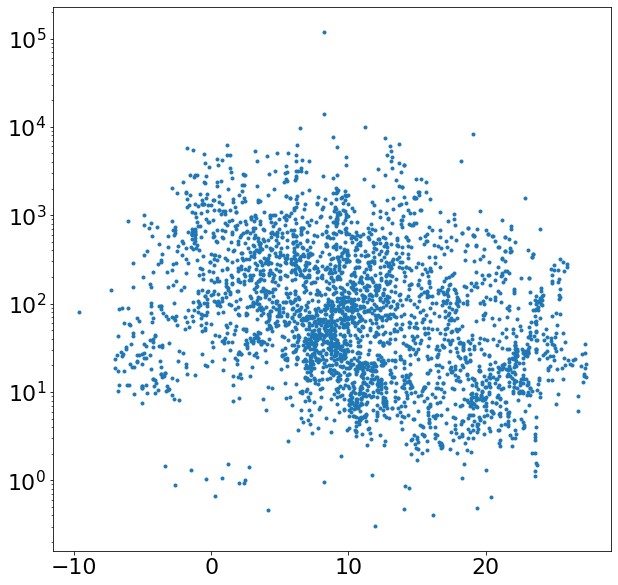

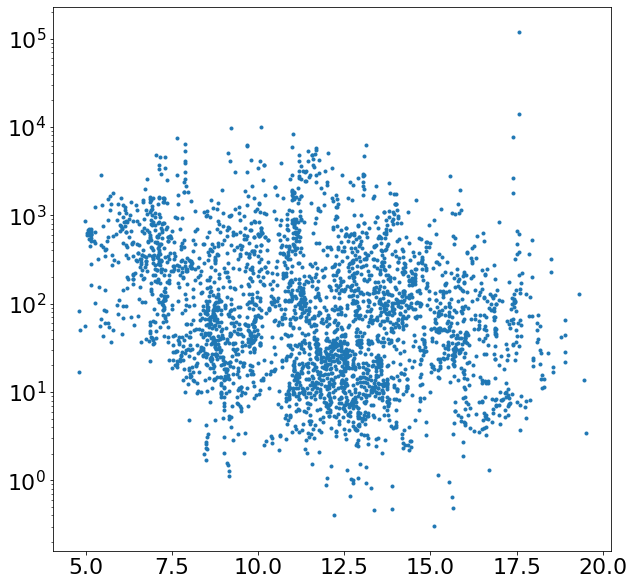

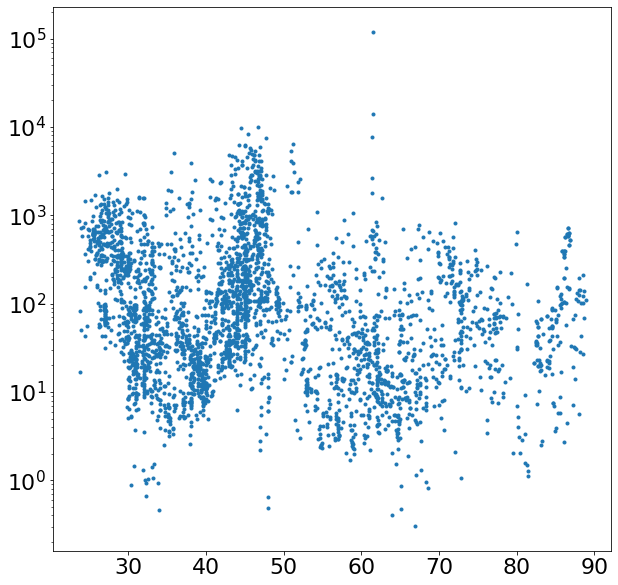

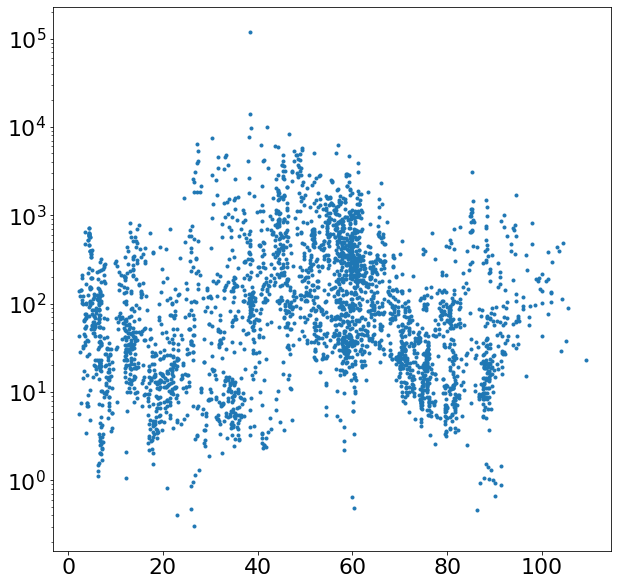

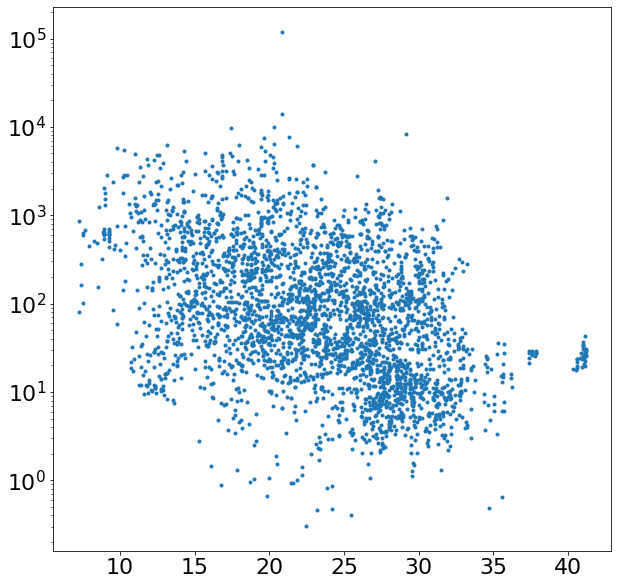

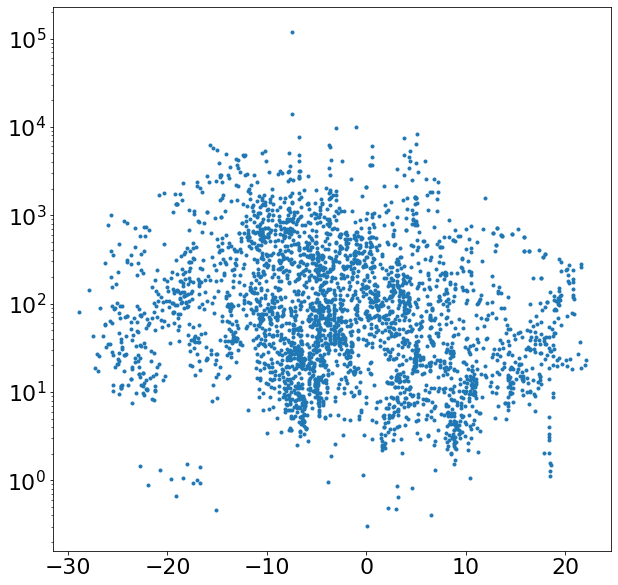

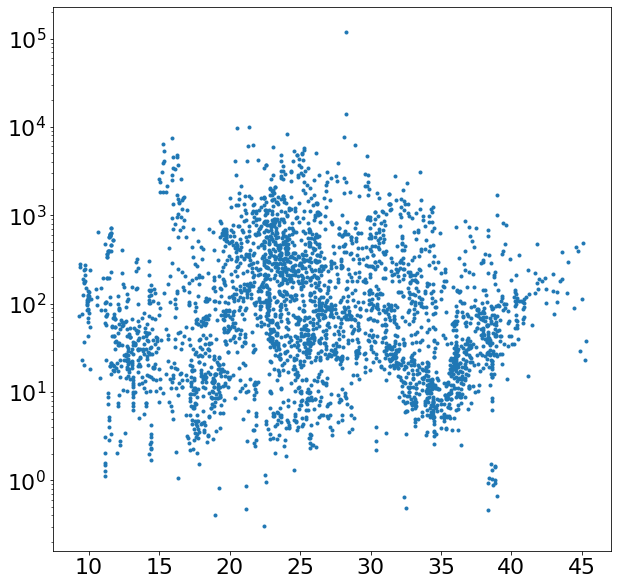

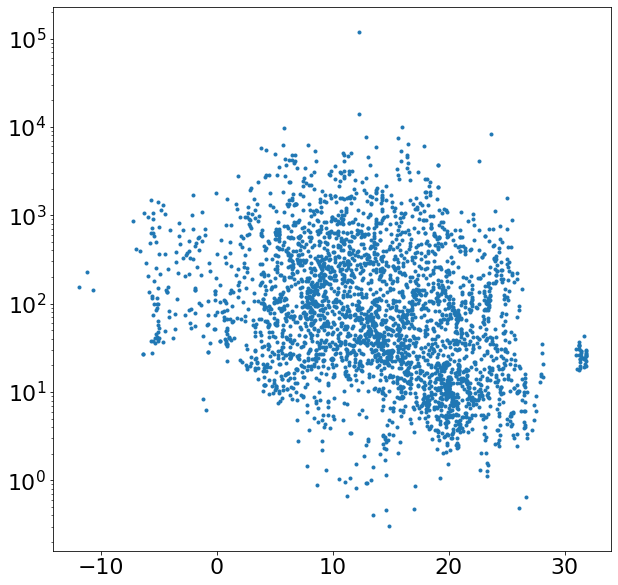

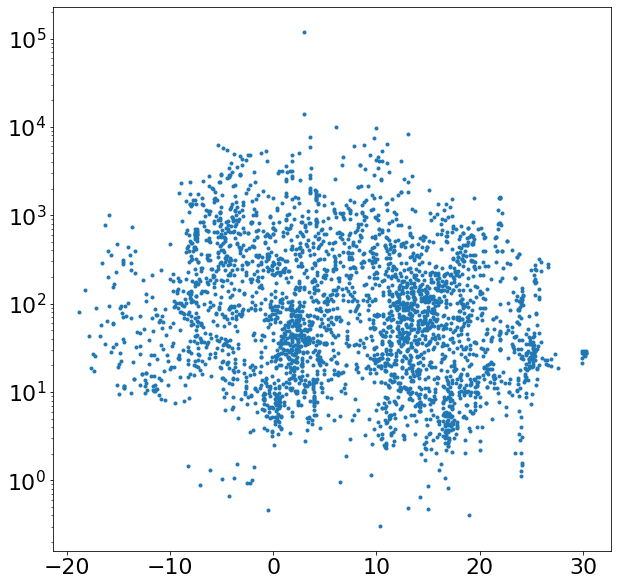

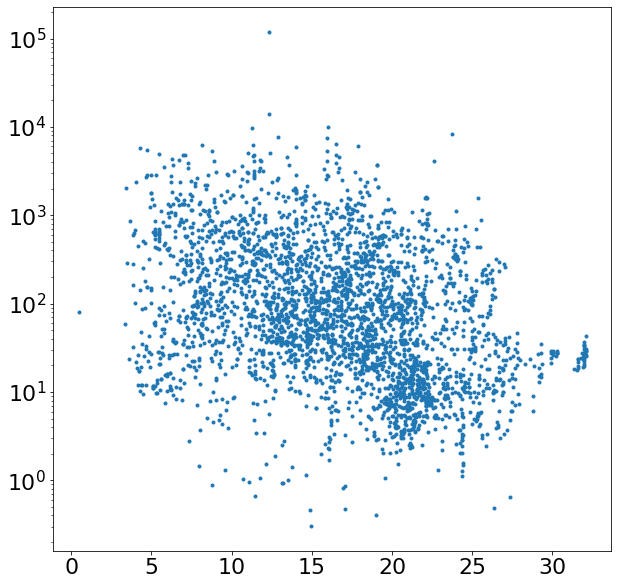

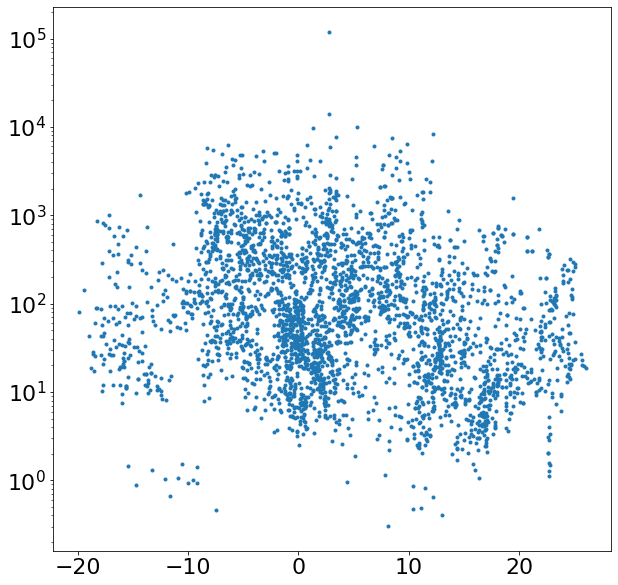

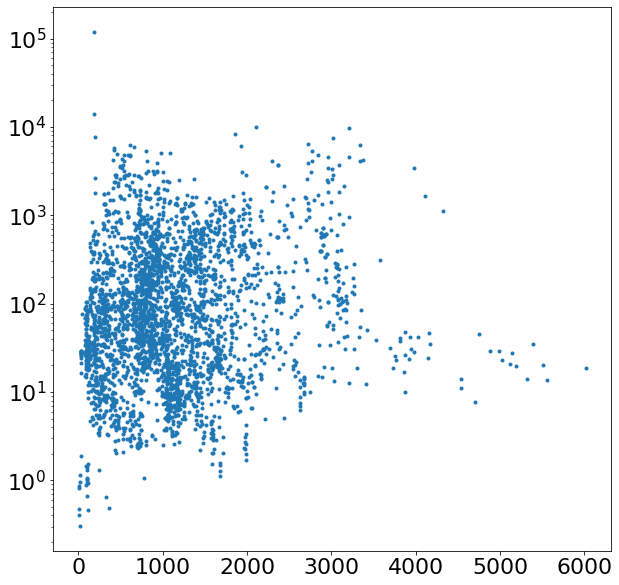

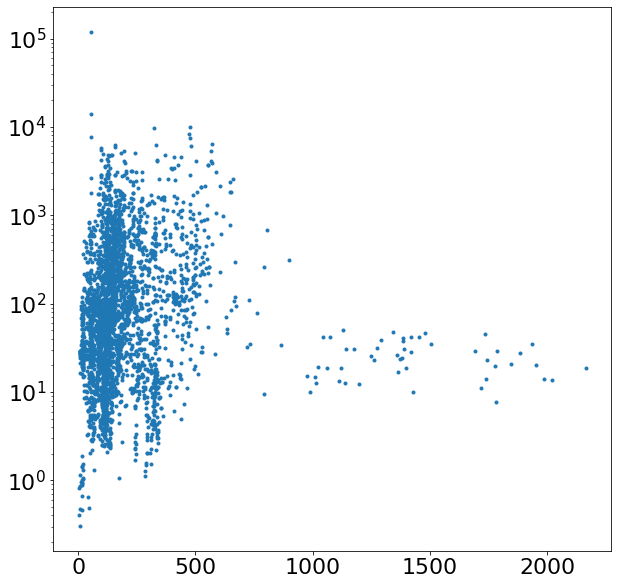

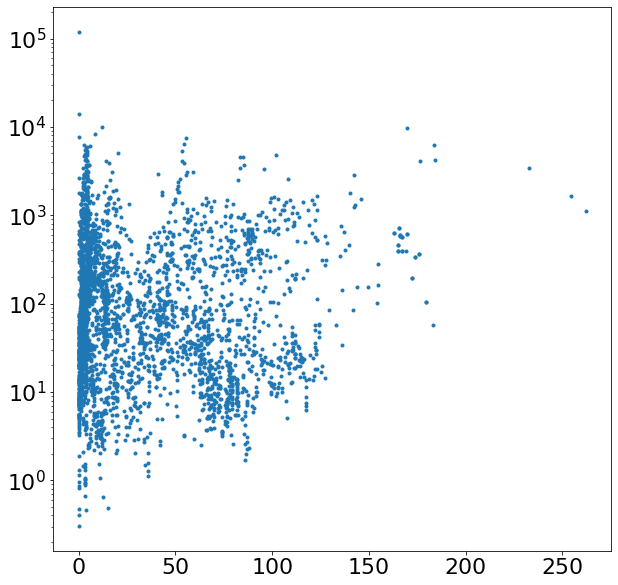

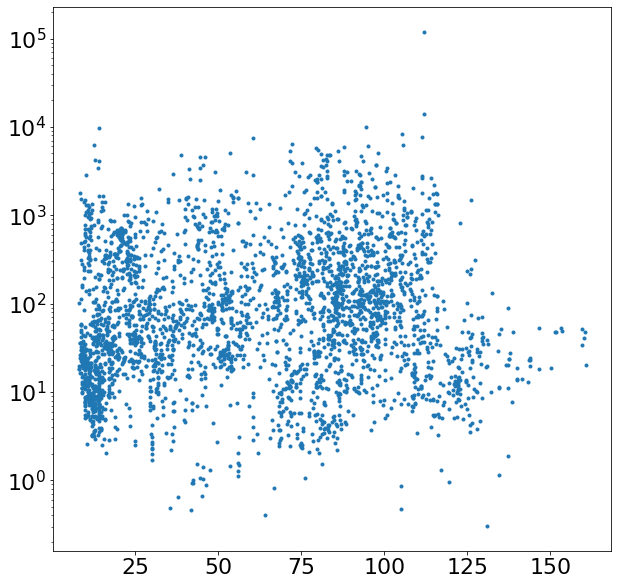

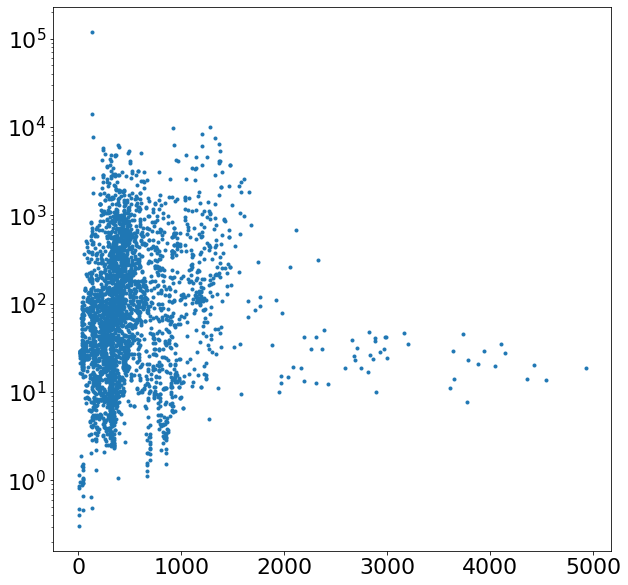

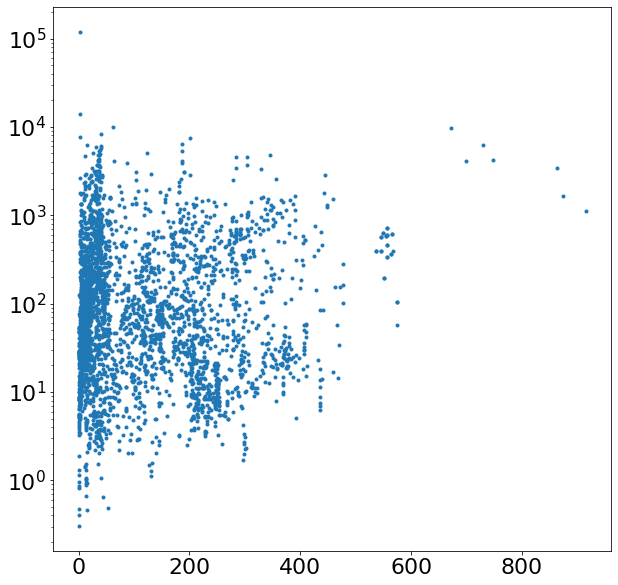

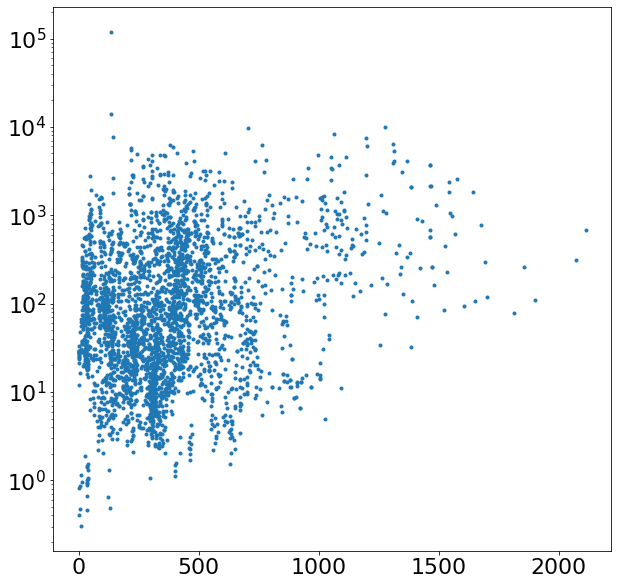

In [918]:
import seaborn as sns
scales = [0,10,10,1,100,10,10,10,10,10,10,10,1,1,1,1,1,1,1,1,1]
a['realid'] = a.index

for i in range(1,19):
    n = pd.read_csv('/Users/gr_1/Google Drive_1/data_earth_engine/basins_bio_{}.csv'.format(str(i)))
    if i == 1:
        ns1 = n
    #ns['bio'+str(i)] = n['mean']
    # a['ebe_mmkyr'] = np.round(a['slp_ave'],4)
   # n['ebe_mmkyr'] = np.round(n['ebe_mmkyr'],4)
    #n['slp'] = a['slp_ave']
    plt.xscale('log')
    plt.yscale('log')
    n.index = n['realid']
    a['bio' + str(i)] = 0
    #a['bio' + str(i)] = n['mean']/scales[i]
    a['bio' + str(i)] = n['mean']/scales[i]
    #sns.scatterplot(data=a,x='bio' + str(i),y='ksn')
    n.index = range(len(n))
    #a2['bio_old'+str(i)] = n['mean']
for i in range(1,19):
    fig,ax = plt.subplots(figsize=(10,10))

    plt.plot(a['bio' + str(i)],a['ebe_mmkyr'],'.')
    #plt.xscale('log')
    plt.yscale('log')

   # plt.ylim([1, 100])



In [919]:
import jenkspy
#a['meantempclass'] = pd.qcut(a['bio12'],4)
#a['meantempclass'] = pd.cut(a['bio12'],[0,1000,2000,4000,np.Inf])
#a['meantempclass'] = pd.cut(a['bio15'],[0,50,100,150,np.Inf])

#breaks = jenkspy.jenks_breaks(a['bio12'], nb_class=5)
if 0:
    r1 =  np.power(10.0,np.float64(list(np.arange(-2,6,1.75)))).tolist()
    #r1.insert(0,10**-2)
    #r1.insert(len(r1)+1,10**6)
    a['area'][np.isnan(a['area'])] = 0
    a['elev_ave'][a['elev_ave'] == 0] = np.nan
    a['meantempclass'] = pd.cut(a['elev_ave'],5)
    a['meantempclass']

a['meantempclass'] = pd.qcut(a['bio12'],5)
#a['meantempclass'] = list(zip(pd.qcut(a['bio12'],3), pd.qcut(a['bio1'],3)))
#a['meantempclass'] = pd.qcut(a['bio1'] - a['bio14'], 10)


<ipython-input-855-f4c54442928e>:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a2.geometry = a.geometry.centroid


<AxesSubplot:>

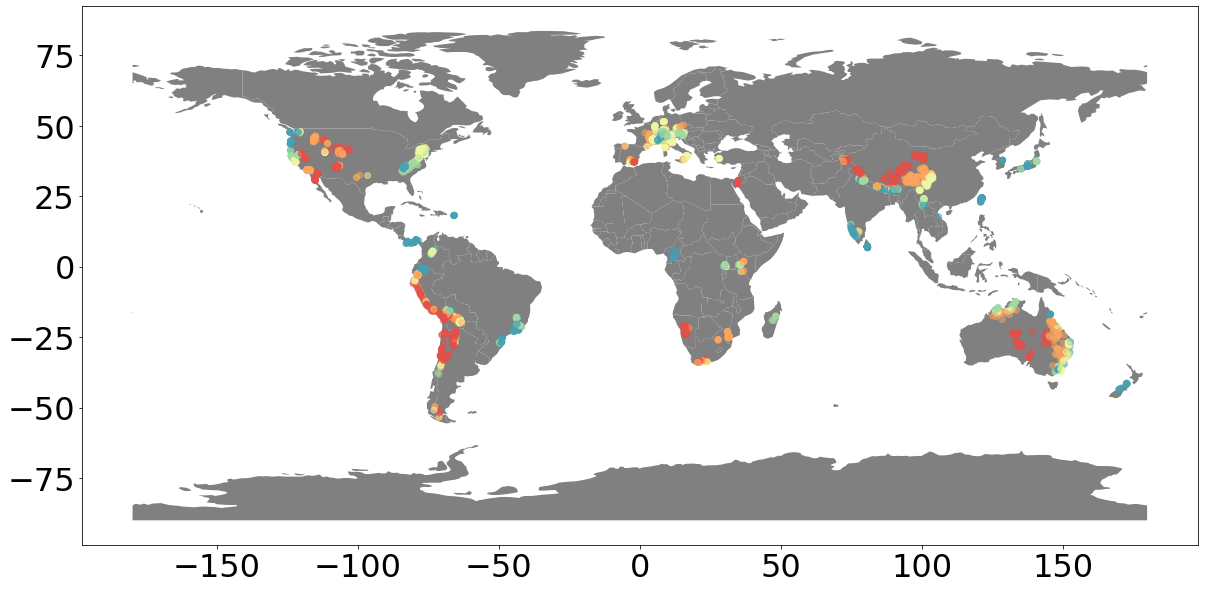

In [855]:
from matplotlib.colors import ListedColormap
plt.rcParams.update({'font.size': 32})
fig,ax = plt.subplots(figsize=(20,10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax,color='grey')
a['geo'] = a['meantempclass']


a2 = a.copy()
a2.geometry = a.geometry.centroid


a2.plot('geo',ax = ax,cmap = ListedColormap(sns.color_palette("Spectral").as_hex()[:7]),alpha=.5)
#plt.imshow(f)

In [713]:
lith = 1
if lith:
    a['meantempclass'] = np.load('geo_major.npy',allow_pickle = True)

In [677]:
## tectonic regimes
a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octo_327_data')

t = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/tectonic_region/')
a['meantempclass'] = -1
mt1 = np.zeros(len(a))
for i in range(len(a)):
    try:
        mt1[i] = t.index[t.contains(a.geometry[i].centroid)][0]
    except:
        continue
a['meantempclass'] = np.int32(mt1)

In [678]:
t.index = np.arange(len(t))
a.index = np.arange(len(a))
regions = t['region'][a['meantempclass']]
regions.index = np.arange(len(regions))
a['region'] = regions
a['id'] = range(len(a))

In [690]:
## Unique cross-validation type thing
a.index = range(len(a))
a['meantempclass'] = pd.qcut(a.rank(method='first').x_wgs84,711,duplicates='drop')
a.index = range(len(a))

In [691]:
c=0
a['id'] = range(len(a))
groups = np.zeros((1000,1000))
bslen=[]
for i,b in a.groupby('meantempclass'):
    for j in range(len(b)):
        groups[c,j] = np.int32(b.iloc[j]['id'])
    bslen.append(len(b))
    c+=1



In [692]:
m,n = np.shape(groups)
a['meantempclass'] =0
for i in range(0,m):
    for j in range(0,n):
        if groups[i,j] > 0:
            a['meantempclass'][groups[i,j]] = j
## end cross validation

<ipython-input-692-b30c46749132>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['meantempclass'][groups[i,j]] = j
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
# import seaborn as sns
# plt.subplots(figsize=(10,7))
# sns.histplot(data=a,x='bio10',log_scale = False, hue='meantempclass')
# a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octo_327_data')

In [920]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 35#3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
              
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs

In [921]:
from sklearn import linear_model as lm
import sklearn
n = 0
r2s = [None] * len(a['meantempclass'].unique())
mntemp = np.zeros(len(r2s))
abox = pd.DataFrame()
abox['index'] = np.arange(len(eros1[1])*len(a['meantempclass'].unique()))
abox['r2s'] = 0
abox['drat'] = 0
abox['n'] = 0
abox['m/n'] = 0
abox['class'] = 0
abox['drat'] = 0
abox['dratave'] = 0
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

mt = a['meantempclass'].unique()
c=0
for li in range(len(a['meantempclass'].unique())):
    ids = a.index[a['meantempclass'] == a['meantempclass'].unique()[li]]
    
    r2s[li] = np.zeros(len(eros1[1]))
    resid = np.zeros(len(eros1[1]))
    pcoef = np.zeros(len(eros1[1]))
    ks2 = ns.copy()#ks.copy()
    diffus2 = diffus.copy()
    try:
        mntemp[li] = np.mean(a['bio1'][ids])
    except:
        'meh'

    for i in range(len(eros1[1])):#range(len(ms)):
            if dfs[i][ids] is None:
                continue
            
            y = np.log(np.float64(a['ebe_mmkyr'][ids])/1000)
            x = np.log(dfs[i][ids])
            print(len(x[x>0]))
            #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
            #x=x[I_min]
            #y=y[I_min]

            xi = x.copy()
            I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
            x=np.delete(x,I)
            y=np.delete(y,I)
            I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
            x = np.delete(x,I2)
            y = np.delete(y,I2)
            
            
            l1  = lm.LinearRegression(fit_intercept=False)
            l = lm.LinearRegression(fit_intercept=False)
            if len(x[np.logical_not(np.isnan(x))])>50:
                
                    #print(a.loc[ids[0],'meantempclass'])
                    p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                    p = l.fit(x.reshape(-1,1), y.reshape(-1,1 ))
                    
                    intercept =np.mean(y-x)
                    y2 = x+intercept
                  #  ####
                   # if 1:
                       # x = x[ y2 > -4 ]

                       # y = y[ y2 > -4 ]
                       # y2 = y2[y2>-4]
                    ####
                   # y2 = p.predict(x.reshape(-1,1))
                    y3 = np.exp(x) * p1.coef_#p1.predict(np.exp(x.reshape(-1,1)))
                    r2s[li][i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)
                    r2s[li][i] = 1 - sklearn.metrics.mean_absolute_error(y.reshape(-1,1),y2)
                    diffus2[i] *= p1.coef_
                    #ks2[i] *= p1.coef_
                    resid[i] = np.mean(np.abs(np.exp(y.ravel())-y3.ravel()))
                    print(len(y[np.logical_not(np.isnan(x))]))
                    pcoef[i] = p1.coef_
                    
                    abox.loc[c,'r2s'] = r2s[li][i]
                    abox.loc[c,'meantempclass'] = li#
                    abox.loc[c,'class'] = mt[li]
                    abox.loc[c,'n'] = ns[i]
                    abox.loc[c,'D/k'] = diffus[i] / ks[i]
                    abox.loc[c,'Diffusion/total'] = dratave[i] 
                    abox.loc[c,'m/n'] = ms[i] / ns[i]

                    c=c+1
    #abox.loc[ids,''] = r2s[li]

                   # if resid[i]>127.9:
                    #    break
#a['maxr2s'] = dfs[np.argmax('elev_mn')] * pcoef[np.argmax(maxr2s)]


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

1
611
455
611
676
611
208
611
545
611
163
611
155
611
107
611
676
611
676
611
0
611
676
611
0
611
676
611
425
611
654
611
676
611
676
611
576
611
0
611
676
611
0
611
619
611
676
611
618
611
676
611
0
611
676
611
13
611
658
611
332
611
8
611
482
611
611
611
676
611
667
611
587
611
676
611
630
611
676
611
0
611
676
611
676
611
644
611
676
611
676
611
582
611
0
611
676
611
0
611
676
611
0
611
674
611
676
611
1
611
0
611
457
611
12
611
58
611
0
611
0
611
0
611
587
611
7
611
676
611
676
611
0
611
0
611
629
611
480
611
676
611
472
611
676
611
263
611
0
611
676
611
642
611
587
611
668
611
0
611
0
611
676
611
676
611
676
611
320
611
676
611
676
611
585
611
676
611
23
611
676
611
569
611
676

<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.


611
676
611
651
611
0
611
0
611
0
611
313
611
518
611
676
611
642
611
676
611
15
611
675
611
0
611
676
611
676
611
40
611
676
611
407
611
0
611
676
611
0
611
676
611
0
611
0
611
676
611
532
611
676
611
177
611
561
611
0
611
676
611
287
611
581
611
667
611
676
611
643
611
638
611
676
611
0
611
602
611
6
611
676
611
0
611
0
611
0
611
644
611
0
611
0
611
676
611
0
611
90
611
0
611
676
611
589
611
676
611
0
611
465
611
676
611
33
611
676
611
0
611
660
611
37
611
676
611
671
611
301
611
676
611
0
611
20
611
498
611
676
611
601
611
491
611
676
611
676
611
676
611
676
611
676
611
676
611
374
611
676
611
676
611
0
611
672
611
0
611
675
611
617
611
0
611
0
611
0
611
0
611
93
611
641


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

611
0
611
23
611
674
611
676
611
431
611
0
611
676
611
676
611
676
611
598
611
0
611
629
611
527
611
349
611
676
611
676
611
1
611
0
611
676
611
676
611
676
611
617
611
675
611
602
611
676
611
676
611
676
611
676
611
191
611
0
611
676
611
608
611
32
611
0
611
0
611
676
611
676
611
676
611
464
611
40
611
676
611
676
611
0
611
676
611
0
611
0
611
0
611
0
611
44
611
676
611
676
611
604
611
676
611
260
611
676
611
676
611
676
611
641
611
649
611
0
611
0
611
676
611
0
611
676
611
108
611
527
611
676
611
676
611
586
611
507
611
643
611
676
611
0
611
676
611
0
611
676
611
0
611
577
611
676
611
676
611
676
611
675
611
370
611
437
611
675
611
0
611
0
611
614
611
676
611
477
611
11
611
641
611
676
611
675
611


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

676
611
676
611
676
611
676
611
676
611
676
611
0
611
676
611
0
611
676
611
676
611
676
611
676
611
157
611
367
611
651
611
676
611
0
611
499
611
676
611
0
611
0
611
646
611
3
611
676
611
623
611
0
611
639
611
676
611
599
611
676
611
676
611
642
611
295
611
676
611
644
611
575
611
668
611
630
611
643
611
137
611
672
611
676
611
0
611
34
611
0
611
676
611
676
611
0
611
19
611
76
611
676
611
676
611
668
611
0
611
676
611
676
611
676
611
676
611
0
611
0
611
676
611
7
611
458
611
643
611
676
611
676
611
0
611
676
611
0
611
676
611
676
611
36
611
641
611
455
611
675
611
424
611
471
611
676
611
0
611
676
611
0
611
0
611
676
611
676
611
332
611
625
611
643
611
676
611
676
611
676
611
0
611
0
611


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

409
611
0
611
676
611
601
611
557
611
631
611
676
611
676
611
0
611
0
611
0
611
676
611
0
611
0
611
343
611
0
611
0
611
62
611
474
611
676
611
674
611
0
611
672
611
0
611
676
611
0
611
570
611
641
611
676
611
7
611
640
611
676
611
0
611
676
611
676
611
84
611
676
611
676
611
447
611
642
611
676
611
676
611
0
611
676
611
676
611
676
611
676
611
0
611
676
611
617
611
676
611
676
611
596
611
0
611
676
611
569
611
676
611
676
611
624
611
0
611
604
611
492
611
220
611
0
611
0
611
676
611
676
611
676
611
492
611
653
611
676
611
676
611
676
611
3
611
358
611
676
611
12
611
676
611
676
611
617
611
668
611
0
611
547
611
676
611
676
611
643
611
676
611
629
611
676
611
237
611
641
611
266
611
676
611
669
611
652


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

611
459
611
530
611
676
611
676
611
544
611
676
611
144
611
676
611
676
611
676
611
676
611
676
611
676
611
586
611
526
611
676
611
0
611
628
611
676
611
676
611
676
611
596
611
0
611
676
611
676
611
671
611
676
611
642
611
676
611
676
611
521
611
676
611
0
611
0
611
676
611
0
611
676
611
0
611
312
611
676
611
676
611
676
611
0
611
676
611
676
611
676
611
676
611
676
611
676
611
25
611
0
611
0
611
676
611
642
611
668
611
676
611
0
611
548
611
0
611
676
611
676
611
676
611
676
611
139
611
12
611
373
611
379
611
676
611
639
611
676
611
631
611
676
611
676
611
277
611
676
611
676
611
0
611
676
611
674
611
0
611


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

97
611
356
611
676
611
676
611
586
611
676
611
676
611
417
611
676
611
0
611
617
611
0
611
615
611
639
611
0
611
0
611
623
611
0
611
676
611
0
611
0
611
0
611
676
611
285
611
0
611
0
611
676
611
676
611
676
611
0
611
676
611
12
611
676
611
0
611
0
611
676
611
676
611
643
611
676
611
672
611
0
611
460
611
676
611
676
611
676
611
676
611
581
611
290
611
642
611
649
611
528
611
648
611
676
611
676
611
531
611
629
611
0
611
31
611
676
611
676
611
223
611
676
611
676
611
676
611
676
611
676
611
309
611
0
611
94
611
285
611
676
611
638
611
676
611
486
611
0
611
676
611
668
611
0
611
676
611
12
611
0
611
0
611
229
611
676
611
260
611


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

462
611
676
611
167
611
517
611
676
611
0
611
676
611
676
611
643
611
676
611
400
611
642
611
618
611
454
611
0
611
20
611
651
611
676
611
622
611
540
611
674
611
676
611
676
611
385
611
642
611
0
611
0
611
676
611
0
611
676
611
676
611
676
611
0
611
676
611
676
611
676
611
543
611
0
611
0
611
0
611
676
611
676
611
550
611
0
611
630
611
0
611
676
611
7
611
676
611
326
611
0
611
399
611
198
611
38
611
7
611
676
611
641
611
642
611
0
611
676
611
7
611
676
611
0
611
676
611
545
611
0
611
676
611
676
611
567
611
0
611
31
611
0
611
676
611
676
611
0
611
0
611
0
611
676
611
519
611
0
611
676
611
0
611
676
611
101
611
618
611
0
611
676
611
462
611
676
611
643
611
676
611
11
611
0
611
676
611


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

418
611
0
611
676
611
0
611
7
611
676
611
675
611
583
611
676
611
427
611
676
611
672
611
463
611
369
611
676
611
676
611
676
611
574
611
676
611
0
611
0
611
668
611
0
611
676
611
0
611
676
611
483
611
633
611
676
611
618
611
676
611
581
611
672
611
676
611
583
611
676
611
0
611
676
611
676
611
676
611
676
611
676
611
266
611
676
611
676
611
676
611
676
611
676
611
676
611
0
611
530
611
652
611
676
611
0
611
0
611
676
611
676
611
250
611
0
611
0
611
0
611
676
611
676
611
185
611
676
611
676
611
0
611
0
611
133
611
512
611
676
611
676
611
231
611
0
611
0
611
672
611
2
611
676
611
676
611
480
611
652
611
0
611
524
611
676
611
676
611
676
611
676
611
676
611
676
611


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

676
611
676
611
654
611
0
611
676
611
216
611
676
611
643
611
308
611
676
611
0
611
0
611
676
611
676
611
0
611
674
611
676
611
676
611
0
611
676
611
675
611
554
611
676
611
643
611
674
611
676
611
0
611
642
611
0
611
676
611
510
611
676
611
628
611
676
611
648
611
0
611
676
611
676
611
99
611
676
611
0
611
544
611
272
611
676
611
526
611
672
611
676
611
0
611
643
611
358
611
5
611
0
611
675
611
260
611
676
611
643
611
0
611
0
611
0
611
676
611
0
611
159
611
0
611
676
611
0
611
676
611
0
611
335
611
630
611
676
611
630
611
604
611
3
611
559
611
656
611
519
611
431
611
0
611
475
611
642
611
676
611
676
611
0
611
615
611
426
611
0
611
20
611
676
611
529
611
363
611
13
611
236
611
676
611


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

676
611
641
611
477
611
0
611
676
611
0
611
676
611
0
611
676
611
0
611
676
611
0
611
0
611
213
611
667
611
557
611
676
611
676
611
676
611
99
611
676
611
676
611
676
611
676
611
217
611
449
611
581
611
229
611
676
611
676
611
545
611
531
611
257
611
433
611
676
611
20
611
10
611
590
611
220
611
19
611
0
611
81
611
199
611
676
611
676
611
0
611
676
611
676
611
0
611
676
611
0
611
199
611
676
611
639
611
663
611
445
611
0
611
672
611
0
611
553
611
0
611
0
611
429
611
676
611
676
611
448
611
611
611
586
611
617
611
676
611
633
611
676
611
642
611
676
611
569
611
676
611
676
611
626
611
486
611
676
611
0
611
676
611
676
611
0
611
644
611
0
611
676
611
676
611
676
611
518
611
676
611
0
592
465
592
667


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

592
259
592
572
592
173
592
185
592
122
592
667
592
667
592
0
592
667
592
0
592
662
592
478
592
630
592
667
592
667
592
596
592
0
592
662
592
0
592
627
592
665
592
625
592
667
592
0
592
663
592
55
592
637
592
413
592
49
592
542
592
587
592
667
592
642
592
574
592
665
592
630
592
665
592
0
592
667
592
667
592
639
592
667
592
667
592
601
592
0
592
667
592
0
592
667
592
0
592
660
592
661
592
0
592
0
592
511
592
47
592
119
592
0
592
0
592
0
592
607
592
10
592
667
592
661
592
0
592
0
592
597
592
540
592
662
592
488
592
667
592
270
592
0
592
667
592
642
592
606
592
657
592
0
592
0
592
667
592
667
592
665
592
344
592
667
592
667
592
605
592
667
592
72
592
667
592
584
592
667
592
665
592
628
592
0
592
0
592

<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.


0
592
329
592
560
592
667
592
640
592
667
592
60
592
660
592
0
592
667
592
665
592
104
592
667
592
454
592
0
592
667
592
0
592
667
592
0
592
0
592
667
592
573
592
665
592
179
592
582
592
0
592
667
592
293
592
571
592
643
592
662
592
642
592
623
592
667
592
0
592
614
592
8
592
662
592
0
592
0
592
0
592
616
592
0
592
0
592
667
592
0
592
143
592
0
592
661
592
608
592
662
592
0
592
515
592
667
592
62
592
667
592
0
592
640
592
72
592
667
592
656
592
384
592
667
592
0
592
68
592
552
592
667
592
613
592
545
592
667
592
667
592
662
592
667
592
667
592
667
592
423
592
667
592
664
592
0
592
660
592
0
592
661
592
624
592
0
592
0
592
0
592
0
592
145
592
637
592
0
592
72
592


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

660
592
667
592
487
592
0
592
665
592
667
592
663
592
610
592
0
592
629
592
569
592
420
592
667
592
667
592
0
592
0
592
667
592
667
592
667
592
624
592
661
592
614
592
665
592
667
592
667
592
666
592
235
592
0
592
667
592
583
592
89
592
0
592
0
592
667
592
667
592
667
592
517
592
104
592
667
592
667
592
0
592
667
592
0
592
0
592
0
592
0
592
104
592
667
592
667
592
616
592
667
592
269
592
665
592
667
592
661
592
612
592
621
592
0
592
0
592
665
592
0
592
666
592
147
592
568
592
667
592
665
592
606
592
523
592
643
592
663
592
0
592
667
592
0
592
667
592
0
592
597
592
662
592
667
592
663
592
660
592
416
592
459
592
661
592
6
592
0
592
603
592
667
592
536
592
28
592
638
592
667
592
660
592
667
592
667
592
667
592


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

667
592
667
592
667
592
0
592
667
592
0
592
667
592
665
592
663
592
667
592
192
592
409
592
636
592
667
592
0
592
551
592
665
592
0
592
0
592
618
592
3
592
667
592
594
592
0
592
633
592
667
592
581
592
667
592
663
592
639
592
310
592
667
592
641
592
594
592
651
592
630
592
640
592
163
592
655
592
665
592
0
592
97
592
0
592
667
592
667
592
0
592
44
592
129
592
667
592
667
592
649
592
0
592
667
592
667
592
663
592
667
592
0
592
0
592
664
592
14
592
512
592
642
592
667
592
667
592
0
592
667
592
0
592
667
592
667
592
102
592
635
592
465
592
660
592
478
592
516
592
667
592
0
592
667
592
0
592
0
592
662
592
664
592
363
592
606
592
638
592
667
592
665
592
667
592
0
592
0
592
459
592
0
592
667
592
611
592
579
592
631
592
663
592
667
592
0
592
0
592
0
592
667
592
0
592
0
592
378
592
0
592
0
592
85
592
527
592
667
592
659
592
0
592
654
592
0
592
667
592
0
592
592
592
637
592
667
592
10
592
634
592
667
592
0
592
667
592
665
592
135
592
667
592
661
592
493
592
639
592
667
592
667
592
0
592
667
592

<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.


667
592
575
592
667
592
165
592
665
592
667
592
667
592
662
592
665
592
667
592
606
592
544
592
667
592
0
592
620
592
667
592
665
592
667
592
605
592
0
592
667
592
665
592
658
592
667
592
641
592
667
592
667
592
561
592
665
592
0
592
0
592
667
592
0
592
667
592
0
592
332
592
667
592
661
592
667
592
0
592
667
592
667
592
667
592
667
592
665
592
667
592
75
592
0
592
0
592
667
592
640
592
648
592
667
592
0
592
575
592
0
592
667
592
665
592
667
592
667
592
148
592
53
592
424
592
431
592
667
592
634
592
667
592
631
592
667
592
667
592
278
592
667
592
667
592
0
592
664
592
660
592
0
592
144
592
396
592
667
592
667
592
606
592
667
592
661
592
466
592
665
592
0
592
624
592
0
592
622
592
634
592
0
592
0


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

592
594
592
0
592
667
592
0
592
0
592
0
592
667
592
290
592
0
592
0
592
667
592
667
592
667
592
0
592
667
592
41
592
665
592
0
592
0
592
667
592
667
592
643
592
667
592
655
592
0
592
470
592
667
592
667
592
667
592
667
592
601
592
303
592
640
592
621
592
569
592
620
592
663
592
667
592
572
592
596
592
0
592
78
592
667
592
663
592
233
592
667
592
667
592
667
592
667
592
665
592
329
592
0
592
144
592
291
592
667
592
631
592
667
592
511
592
0
592
666
592
649
592
0
592
667
592
31
592
0
592
0
592
235
592
661
592
270
592
520
592
667
592
177
592
557
592
666
592
0
592
667
592
667
592
643
592
667
592
429
592
640
592
625
592
505
592
0
592
69
592
637
592
665
592
627
592
575
592
659
592
667
592
667
592
434
592
640
592
0
592
0


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

592
667
592
0
592
667
592
667
592
667
592
0
592
667
592
662
592
667
592
574
592
0
592
0
592
0
592
667
592
665
592
575
592
0
592
631
592
0
592
667
592
10
592
666
592
355
592
0
592
443
592
195
592
64
592
20
592
667
592
637
592
641
592
0
592
667
592
15
592
667
592
0
592
667
592
575
592
0
592
667
592
661
592
562
592
0
592
79
592
0
592
667
592
667
592
0
592
0
592
0
592
662
592
543
592
0
592
667
592
0
592
667
592
146
592
625
592
0
592
662
592
520
592
663
592
643
592
667
592
37
592
0
592
665
592
469
592
0
592
663
592
0
592
16
592
665
592
660
592
601
592
665
592
479
592
663
592
654
592
523
592
413
592
667
592
667
592
667
592
594
592
667
592
0
592
0
592
653
592
0


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

592
667
592
0
592
667
592
542
592
629
592
667
592
624
592
667
592
580
592
659
592
667
592
601
592
666
592
0
592
667
592
667
592
667
592
667
592
667
592
275
592
667
592
667
592
667
592
667
592
667
592
667
592
0
592
552
592
625
592
666
592
0
592
0
592
667
592
665
592
260
592
0
592
0
592
0
592
667
592
667
592
224
592
663
592
667
592
0
592
0
592
152
592
539
592
667
592
667
592
243
592
0
592
0
592
655
592
0
592
667
592
667
592
539
592
640
592
0
592
563
592
667
592
667
592
667
592
667
592
667
592
667
592
661
592
667
592
631
592
0
592
667
592
224
592
661
592
615
592
327
592
667
592
0
592
0
592
667
592
667
592
0
592
660
592
667
592
667
592
0
592
666
592
661
592
576
592
665
592
642
592
659
592
667
592
0
592
639


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

592
0
592
667
592
539
592
667
592
629
592
665
592
636
592
0
592
667
592
667
592
144
592
667
592
0
592
575
592
276
592
667
592
568
592
654
592
667
592
0
592
643
592
397
592
5
592
0
592
660
592
268
592
665
592
643
592
0
592
0
592
0
592
667
592
0
592
190
592
0
592
667
592
0
592
667
592
0
592
367
592
630
592
667
592
630
592
616
592
3
592
561
592
641
592
541
592
460
592
0
592
529
592
640
592
663
592
667
592
0
592
622
592
478
592
0
592
68
592
667
592
570
592
398
592
56
592
251
592
667
592
665
592
638
592
535
592
0
592
667
592
0
592
666
592
0
592
667
592
0
592
667
592
0
592
0
592
213
592
649
592
579
592
666
592
667
592
667
592
144
592
667
592
667
592
667
592
663
592
226
592
496
592
601
592
237
592
667
592


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

667
592
575
592
572
592
265
592
488
592
662
592
68
592
25
592
604
592
278
592
44
592
0
592
134
592
199
592
667
592
661
592
0
592
667
592
662
592
0
592
667
592
0
592
200
592
667
592
634
592
634
592
493
592
0
592
654
592
0
592
575
592
0
592
0
592
485
592
667
592
667
592
493
592
621
592
574
592
622
592
667
592
599
592
667
592
639
592
667
592
590
592
661
592
666
592
628
592
514
592
667
592
0
592
665
592
665
592
0
592
643
592
0
592
667
592
667
592
665
592
560
592
667
592
1
644
490
644
694
644
293
644
602
644
162
644
227
644
165
644
694
644
694
644
0
644
694
644
0
644
694
644
481
644
684
644
694
644
694
644
624
644
0
644
694
644
0
644
677
644
694
644
675
644
694
644
0
644
694
644
46
644
687


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

644
415
644
57
644
558
644
658
644
694
644
692
644
642
644
694
644
680
644
694
644
0
644
694
644
694
644
686
644
694
644
694
644
633
644
0
644
694
644
0
644
694
644
0
644
693
644
694
644
1
644
0
644
523
644
39
644
107
644
0
644
0
644
0
644
647
644
15
644
694
644
692
644
0
644
0
644
666
644
558
644
694
644
512
644
694
644
276
644
0
644
694
644
686
644
643
644
692
644
0
644
0
644
694
644
694
644
694
644
363
644
694
644
694
644
641
644
694
644
83
644
694
644
618
644
694
644
694
644
679
644
0
644
0
644
0
644
343
644
585
644
694
644
686
644
694
644
66
644
692
644
0
644
694
644
694
644
98
644
694
644
451
644
0
644
694
644
0
644
694
644
0
644
0
644
694
644
601
644
694
644
173
644
618
644
0
644
694
644
300


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

644
635
644
692
644
694
644
686
644
674
644
694
644
0
644
652
644
14
644
694
644
0
644
0
644
0
644
682
644
0
644
0
644
694
644
0
644
124
644
0
644
692
644
647
644
694
644
0
644
530
644
694
644
84
644
694
644
0
644
686
644
88
644
694
644
692
644
392
644
694
644
0
644
65
644
571
644
694
644
652
644
564
644
694
644
694
644
694
644
694
644
694
644
694
644
401
644
694
644
694
644
0
644
693
644
0
644
692
644
674
644
0
644
0
644
0
644
0
644
132
644
684
644
0
644
86
644
693
644
694
644
496
644
0
644
694
644
694
644
694
644
649
644
0
644
680
644
594
644
426
644
694
644
694
644
1
644
0
644
694
644
694
644
694
644
674
644
692
644
653
644
694
644
694
644
694
644
694
644
276
644
0
644
694
644
652
644
94
644
0


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

644
0
644
694
644
694
644
694
644
532
644
99
644
694
644
694
644
0
644
694
644
0
644
0
644
0
644
0
644
99
644
694
644
694
644
664
644
694
644
273
644
694
644
694
644
693
644
678
644
683
644
0
644
0
644
694
644
0
644
694
644
136
644
596
644
694
644
694
644
642
644
549
644
686
644
694
644
0
644
694
644
0
644
694
644
0
644
624
644
694
644
694
644
694
644
692
644
396
644
476
644
692
644
0
644
0
644
649
644
694
644
551
644
34
644
685
644
694
644
693
644
694
644
694
644
694
644
694
644
694
644
694
644
0
644
694
644
0
644
694
644
694
644
694
644
694
644
230
644
389
644
686
644
694
644
0
644
569
644
694
644
0
644
0
644
683
644
5
644
694
644
663
644
0
644
681
644
694
644
653
644
694
644
694
644
686
644
309
644
694


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

644
686
644
624
644
691
644
680
644
686
644
164
644
692
644
694
644
0
644
98
644
0
644
694
644
694
644
0
644
54
644
116
644
694
644
694
644
692
644
0
644
694
644
694
644
694
644
694
644
0
644
0
644
694
644
9
644
525
644
686
644
694
644
694
644
0
644
694
644
0
644
694
644
694
644
98
644
683
644
490
644
692
644
475
644
538
644
694
644
0
644
694
644
0
644
0
644
694
644
694
644
354
644
660
644
685
644
694
644
694
644
694
644
0
644
0
644
451
644
0
644
694
644
650
644
618
644
680
644
694
644
694
644
0
644
0
644
0
644
694
644
0
644
0
644
365
644
0
644
0
644
105
644
547
644
694
644
692
644
0
644
690
644
0
644
694
644
0
644
621
644
684
644
694
644
6
644
682
644
694
644
0
644
694
644
694
644
123
644
694


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

644
692
644
510
644
685
644
694
644
694
644
0
644
694
644
694
644
694
644
694
644
0
644
694
644
674
644
694
644
694
644
648
644
0
644
694
644
610
644
694
644
694
644
664
644
0
644
664
644
570
644
308
644
0
644
0
644
694
644
694
644
694
644
565
644
682
644
694
644
694
644
694
644
2
644
389
644
694
644
36
644
694
644
694
644
674
644
692
644
0
644
607
644
694
644
694
644
686
644
694
644
666
644
694
644
247
644
684
644
280
644
694
644
692
644
688
644
529
644
599
644
694
644
694
644
608
644
694
644
153
644
694
644
694
644
694
644
694
644
694
644
694
644
642
644
591
644
694
644
0
644
673
644
694
644
694
644
694
644
645
644
0
644
694
644
694
644
692
644
694
644
686
644
694
644
694
644
585
644
694
644
0
644
0
644
694
644
0
644
694


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

644
0
644
326
644
694
644
694
644
694
644
0
644
694
644
694
644
694
644
694
644
694
644
694
644
92
644
0
644
0
644
694
644
686
644
691
644
694
644
0
644
611
644
0
644
694
644
694
644
694
644
694
644
191
644
44
644
402
644
416
644
694
644
682
644
694
644
680
644
694
644
694
644
288
644
694
644
694
644
0
644
694
644
692
644
0
644
130
644
373
644
694
644
694
644
642
644
694
644
692
644
462
644
694
644
0
644
674
644
0
644
672
644
682
644
0
644
0
644
663
644
0
644
694
644
0
644
0
644
0
644
694
644
293
644
0
644
0
644
694
644
694
644
694
644
0
644
694
644
37
644
694
644
0
644
0
644
694
644
694
644
686
644
694
644
692
644
0
644
494
644
694
644
694
644
694
644
694
644
633
644
306
644
686
644
683
644
599
644
683
644
694
644


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

694
644
601
644
666
644
0
644
91
644
694
644
694
644
227
644
694
644
694
644
694
644
694
644
694
644
321
644
0
644
129
644
294
644
694
644
680
644
694
644
540
644
0
644
694
644
692
644
0
644
694
644
35
644
0
644
0
644
230
644
692
644
273
644
533
644
694
644
164
644
589
644
694
644
0
644
694
644
694
644
686
644
694
644
448
644
686
644
675
644
519
644
0
644
79
644
687
644
694
644
678
644
604
644
692
644
694
644
694
644
430
644
686
644
0
644
0
644
694
644
0
644
694
644
694
644
694
644
0
644
694
644
694
644
694
644
607
644
0
644
0
644
0
644
694
644
694
644
610
644
0
644
680
644
0
644
694
644
15
644
694
644
351
644
0
644
458
644
194
644
82
644
32
644
694
644
684
644
686
644
0
644
694
644


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

22
644
694
644
0
644
694
644
609
644
0
644
694
644
692
644
620
644
0
644
92
644
0
644
694
644
694
644
0
644
0
644
0
644
694
644
582
644
0
644
694
644
0
644
694
644
141
644
675
644
0
644
694
644
533
644
694
644
686
644
694
644
39
644
0
644
694
644
467
644
0
644
694
644
0
644
22
644
694
644
692
644
634
644
694
644
487
644
694
644
690
644
533
644
425
644
694
644
694
644
694
644
623
644
694
644
0
644
0
644
692
644
0
644
694
644
0
644
694
644
558
644
678
644
694
644
674
644
694
644
616
644
693
644
694
644
634
644
694
644
0
644
694
644
694
644
694
644
694
644
694
644
282
644
694
644
694
644
694
644
694
644
694
644
694
644
0
644
606
644
684
644
694
644
0
644
0
644
694
644
694
644
265
644
0
644
0
644
0


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

644
694
644
694
644
259
644
694
644
694
644
0
644
0
644
193
644
573
644
694
644
694
644
244
644
0
644
0
644
692
644
1
644
694
644
694
644
558
644
688
644
0
644
592
644
694
644
694
644
694
644
694
644
694
644
694
644
692
644
694
644
684
644
0
644
694
644
217
644
692
644
682
644
321
644
694
644
0
644
0
644
694
644
694
644
0
644
692
644
694
644
694
644
0
644
694
644
692
644
609
644
694
644
686
644
692
644
694
644
0
644
685
644
0
644
694
644
571
644
694
644
679
644
694
644
684
644
0
644
694
644
694
644
131
644
694
644
0
644
608
644
286
644
694
644
598
644
691
644
694
644
0
644
686
644
374
644
11
644
0
644
693
644
270
644
694
644
686
644
0
644
0
644
0
644
694
644
0
644
238
644
0
644
694
644
0
644
694
644


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

0
644
359
644
680
644
694
644
680
644
664
644
4
644
616
644
688
644
560
644
477
644
0
644
548
644
686
644
694
644
694
644
0
644
672
644
481
644
0
644
74
644
694
644
599
644
377
644
47
644
253
644
694
644
694
644
685
644
550
644
0
644
694
644
0
644
694
644
0
644
694
644
0
644
694
644
0
644
0
644
204
644
692
644
614
644
694
644
694
644
694
644
134
644
694
644
694
644
694
644
694
644
217
644
511
644
633
644
231
644
694
644
694
644
608
644
600
644
269
644
499
644
694
644
65
644
28
644
639
644
308
644
54
644
0
644
122
644
194
644
694
644
694
644
0
644
694
644
694
644
0
644
694
644
0
644
191
644
694
644
682
644
690
644
507
644
0
644
690
644
0
644
610
644
0
644
0
644
494
644
694
644
694
644
511
644
670
644
641
644
673


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

644
694
644
667
644
694
644
685
644
694
644
620
644
693
644
694
644
679
644
542
644
694
644
0
644
694
644
694
644
0
644
686
644
0
644
694
644
694
644
694
644
585
644
694
644
0
664
545
664
699
664
291
664
584
664
141
664
241
664
182
664
699
664
699
664
0
664
699
664
0
664
699
664
473
664
694
664
699
664
699
664
603
664
0
664
699
664
0
664
666
664
699
664
665
664
699
664
0
664
699
664
12
664
697
664
428
664
32
664
535
664
680
664
699
664
698
664
670
664
699
664
668
664
699
664
0
664
699
664
699
664
690
664
699
664
699
664
610
664
0
664
699
664
0
664
699
664
0
664
699
664
699
664
0
664
0
664
489
664
7
664
69
664
0
664
0
664
0
664
613
664
10
664
699
664
699
664
0
664
0
664
684
664
534
664
699
664

<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.


570
664
699
664
231
664
0
664
699
664
681
664
612
664
699
664
0
664
0
664
699
664
699
664
699
664
333
664
699
664
699
664
611
664
699
664
33
664
699
664
590
664
699
664
699
664
694
664
0
664
0
664
0
664
309
664
561
664
699
664
681
664
699
664
20
664
699
664
0
664
699
664
699
664
53
664
699
664
421
664
0
664
699
664
0
664
699
664
0
664
0
664
699
664
570
664
699
664
160
664
583
664
0
664
699
664
265
664
660
664
698
664
699
664
685
664
673
664
699
664
0
664
635
664
6
664
699
664
0
664
0
664
0
664
691
664
0
664
0
664
699
664
0
664
99
664
0
664
699
664
616
664
699
664
0
664
555
664
699
664
96
664
699
664
0
664
699
664
98
664
699
664
699
664
398
664
699
664
0
664
24
664
546
664
699
664
635
664
557
664
699


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

664
699
664
699
664
699
664
699
664
699
664
368
664
699
664
699
664
0
664
699
664
0
664
699
664
665
664
0
664
0
664
0
664
0
664
116
664
679
664
0
664
35
664
699
664
699
664
447
664
0
664
699
664
699
664
699
664
621
664
0
664
667
664
572
664
442
664
699
664
699
664
0
664
0
664
699
664
699
664
699
664
665
664
699
664
635
664
699
664
699
664
699
664
699
664
278
664
0
664
699
664
680
664
45
664
0
664
0
664
699
664
699
664
699
664
505
664
59
664
699
664
699
664
0
664
699
664
0
664
0
664
0
664
0
664
56
664
699
664
699
664
641
664
699
664
228
664
699
664
699
664
699
664
690
664
693
664
0
664
0
664
699
664
0
664
699
664
113
664
565
664
699
664
699
664
611
664
588
664
689
664
699
664
0
664

<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.


699
664
0
664
699
664
0
664
604
664
699
664
699
664
699
664
699
664
358
664
530
664
699
664
0
664
0
664
644
664
699
664
529
664
1
664
680
664
699
664
699
664
699
664
699
664
699
664
699
664
699
664
699
664
0
664
699
664
0
664
699
664
699
664
699
664
699
664
244
664
353
664
692
664
699
664
0
664
547
664
699
664
0
664
0
664
693
664
0
664
699
664
684
664
0
664
675
664
699
664
675
664
699
664
699
664
680
664
282
664
699
664
689
664
603
664
699
664
668
664
681
664
157
664
699
664
699
664
0
664
47
664
0
664
699
664
699
664
0
664
71
664
83
664
699
664
699
664
699
664
0
664
699
664
699
664
699
664
699
664
0
664
0
664
699
664
1
664
492
664
685
664
699
664
699
664
0
664
699
664
0
664
699
664
699
664
50
664
678
664
545
664


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

699
664
440
664
565
664
699
664
0
664
699
664
0
664
0
664
699
664
699
664
321
664
679
664
681
664
699
664
699
664
699
664
0
664
0
664
424
664
0
664
699
664
629
664
580
664
671
664
699
664
699
664
0
664
0
664
0
664
699
664
0
664
0
664
334
664
0
664
0
664
127
664
525
664
699
664
699
664
0
664
699
664
0
664
699
664
0
664
597
664
678
664
699
664
0
664
676
664
699
664
0
664
699
664
699
664
93
664
699
664
699
664
473
664
680
664
699
664
699
664
0
664
699
664
699
664
699
664
699
664
0
664
699
664
665
664
699
664
699
664
619
664
0
664
699
664
633
664
699
664
699
664
684
664
0
664
640
664
555
664
303
664
0
664
0
664
699
664
699
664
699
664
556
664
696
664
699
664
699
664
699
664
0
664
350
664


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

699
664
1
664
699
664
699
664
665
664
699
664
0
664
585
664
699
664
699
664
689
664
699
664
684
664
699
664
219
664
679
664
236
664
699
664
699
664
693
664
494
664
568
664
699
664
699
664
574
664
699
664
128
664
699
664
699
664
699
664
699
664
699
664
699
664
611
664
628
664
699
664
0
664
667
664
699
664
699
664
699
664
631
664
0
664
699
664
699
664
699
664
699
664
681
664
699
664
699
664
561
664
699
664
0
664
0
664
699
664
0
664
699
664
0
664
308
664
699
664
699
664
699
664
0
664
699
664
699
664
699
664
699
664
699
664
699
664
40
664
0
664
0
664
699
664
681
664
698
664
699
664
0
664
576
664
0
664
699
664
699
664
699
664
699
664
209
664
9
664
371
664
382
664
699
664
676
664
699
664
671
664
699
664
699
664
239


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

664
699
664
699
664
0
664
699
664
699
664
0
664
108
664
346
664
699
664
699
664
611
664
699
664
699
664
428
664
699
664
0
664
665
664
0
664
661
664
675
664
0
664
0
664
684
664
0
664
699
664
0
664
0
664
0
664
699
664
249
664
0
664
0
664
699
664
699
664
699
664
0
664
699
664
1
664
699
664
0
664
0
664
699
664
699
664
689
664
699
664
699
664
0
664
557
664
699
664
699
664
699
664
699
664
608
664
278
664
681
664
693
664
567
664
693
664
699
664
699
664
568
664
684
664
0
664
42
664
699
664
699
664
211
664
699
664
699
664
699
664
699
664
699
664
300
664
0
664
105
664
251
664
699
664
675
664
699
664
585
664
0
664
699
664
699
664
0
664
699
664
1
664
0
664
0
664
215
664
699
664
229
664
496
664
699
664
144
664
574
664
699
664
0
664


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

699
664
699
664
689
664
699
664
463
664
681
664
665
664
481
664
0
664
28
664
693
664
699
664
666
664
573
664
699
664
699
664
699
664
399
664
681
664
0
664
0
664
699
664
0
664
699
664
699
664
699
664
0
664
699
664
699
664
699
664
575
664
0
664
0
664
0
664
699
664
699
664
576
664
0
664
669
664
0
664
699
664
10
664
699
664
316
664
0
664
507
664
179
664
99
664
27
664
699
664
681
664
681
664
0
664
699
664
19
664
699
664
0
664
699
664
575
664
0
664
699
664
699
664
649
664
0
664
42
664
0
664
699
664
699
664
0
664
0
664
0
664
699
664
621
664
0
664
699
664
0
664
699
664
138
664
665
664
0
664
699
664
496
664
699
664
689
664
699
664
1
664
0
664
699
664
432
664
0
664
699
664
0
664
19
664
699
664


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

699
664
610
664
699
664
443
664
699
664
699
664
505
664
431
664
699
664
699
664
699
664
602
664
699
664
0
664
0
664
699
664
0
664
699
664
0
664
699
664
535
664
672
664
699
664
665
664
699
664
620
664
699
664
699
664
610
664
699
664
0
664
699
664
699
664
699
664
699
664
699
664
236
664
699
664
699
664
699
664
699
664
699
664
699
664
0
664
639
664
692
664
699
664
0
664
0
664
699
664
699
664
224
664
0
664
0
664
0
664
699
664
699
664
271
664
699
664
699
664
0
664
0
664
202
664
612
664
699
664
699
664
218
664
0
664
0
664
699
664
0
664
699
664
699
664
534
664
693
664
0
664
563
664
699
664
699
664
699
664
699
664
699
664
699
664
699
664
699
664
694
664
0
664
699
664
207
664
699
664
691
664
297
664
699
664
0
664


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

0
664
699
664
699
664
0
664
699
664
699
664
699
664
0
664
699
664
699
664
595
664
699
664
685
664
699
664
699
664
0
664
680
664
0
664
699
664
610
664
699
664
667
664
699
664
693
664
0
664
699
664
699
664
108
664
699
664
0
664
574
664
237
664
699
664
572
664
699
664
699
664
0
664
689
664
346
664
4
664
0
664
699
664
235
664
699
664
689
664
0
664
0
664
0
664
699
664
0
664
250
664
0
664
699
664
0
664
699
664
0
664
326
664
670
664
699
664
668
664
641
664
1
664
646
664
693
664
584
664
532
664
0
664
516
664
681
664
699
664
699
664
0
664
659
664
442
664
0
664
25
664
699
664
568
664
347
664
13
664
221
664
699
664
699
664
680
664
529
664
0
664
699
664
0
664
699
664
0
664
699
664
0
664
699
664
0
664
0
664
209
664
699
664


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

578
664
699
664
699
664
699
664
109
664
699
664
699
664
699
664
699
664
207
664
477
664
608
664
216
664
699
664
699
664
574
664
568
664
225
664
449
664
699
664
23
664
1
664
613
664
303
664
72
664
0
664
89
664
181
664
699
664
699
664
0
664
699
664
699
664
0
664
699
664
0
664
192
664
699
664
678
664
697
664
470
664
0
664
699
664
0
664
576
664
0
664
0
664
444
664
699
664
699
664
476
664
652
664
669
664
663
664
699
664
687
664
699
664
680
664
699
664
596
664
699
664
699
664
667
664
590
664
699
664
0
664
699
664
699
664
0
664
689
664
0
664
699
664
699
664
699
664
561
664
699
664
1
687
631
687
701
687
355
687
654
687
189
687
269
687
194
687
701
687
701
687
0
687
701
687
0
687
701
687
578
687
701
687


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

701
687
701
687
668
687
0
687
701
687
0
687
680
687
701
687
679
687
701
687
0
687
701
687
1
687
691
687
519
687
50
687
611
687
699
687
701
687
701
687
683
687
701
687
684
687
701
687
0
687
701
687
701
687
687
687
701
687
701
687
672
687
0
687
701
687
0
687
701
687
0
687
701
687
701
687
0
687
0
687
591
687
1
687
68
687
0
687
0
687
0
687
672
687
16
687
701
687
701
687
0
687
0
687
700
687
610
687
701
687
648
687
701
687
290
687
0
687
701
687
687
687
672
687
701
687
0
687
0
687
701
687
701
687
701
687
448
687
701
687
701
687
672
687
701
687
21
687
701
687
664
687
701
687
701
687
690
687
0
687
0
687
0
687
405
687
637
687
701
687
687
687
701
687
11
687
701
687
0
687
701
687
701
687
45
687
701
687
539
687


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

0
687
701
687
0
687
701
687
0
687
0
687
701
687
645
687
701
687
202
687
661
687
0
687
701
687
323
687
682
687
700
687
701
687
687
687
684
687
701
687
0
687
675
687
10
687
701
687
0
687
0
687
0
687
701
687
0
687
0
687
701
687
0
687
107
687
0
687
701
687
672
687
701
687
0
687
638
687
701
687
110
687
701
687
0
687
701
687
118
687
701
687
701
687
474
687
701
687
0
687
5
687
626
687
701
687
675
687
641
687
701
687
701
687
701
687
701
687
701
687
701
687
493
687
701
687
701
687
0
687
701
687
0
687
701
687
679
687
0
687
0
687
0
687
0
687
132
687
687
687
0
687
26
687
701
687
701
687
567
687
0
687
701
687
701
687
701
687
672
687
0
687
682
687
651
687
546
687
701
687
701
687
0


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

687
0
687
701
687
701
687
701
687
679
687
701
687
675
687
701
687
701
687
701
687
701
687
337
687
0
687
701
687
697
687
36
687
0
687
0
687
701
687
701
687
701
687
598
687
53
687
701
687
701
687
0
687
701
687
0
687
0
687
0
687
0
687
52
687
701
687
701
687
675
687
701
687
286
687
701
687
701
687
701
687
701
687
701
687
0
687
0
687
701
687
0
687
701
687
129
687
644
687
701
687
701
687
672
687
661
687
687
687
701
687
0
687
701
687
0
687
701
687
0
687
671
687
701
687
701
687
701
687
701
687
483
687
623
687
701
687
0
687
0
687
677
687
701
687
610
687
0
687
687
687
701
687
701
687
701
687
701
687
701
687
701
687
701
687
701
687
0
687
701
687
0
687
701
687
701
687
701
687
701
687
268
687
476
687
687
687
701


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

687
0
687
626
687
701
687
0
687
0
687
701
687
1
687
701
687
699
687
0
687
687
687
701
687
684
687
701
687
701
687
687
687
333
687
701
687
687
687
669
687
700
687
684
687
687
687
176
687
701
687
701
687
0
687
41
687
0
687
701
687
701
687
0
687
79
687
81
687
701
687
701
687
701
687
0
687
701
687
701
687
701
687
701
687
0
687
0
687
701
687
0
687
592
687
687
687
701
687
701
687
0
687
701
687
0
687
701
687
701
687
44
687
687
687
631
687
701
687
554
687
653
687
701
687
0
687
701
687
0
687
0
687
701
687
701
687
413
687
686
687
687
687
701
687
701
687
701
687
0
687
0
687
543
687
0
687
701
687
674
687
661
687
685
687
701
687
701
687
0
687
0
687
0
687
701
687
0
687
0
687
427
687
0
687
0


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

687
143
687
606
687
701
687
701
687
0
687
701
687
0
687
701
687
0
687
665
687
687
687
701
687
0
687
687
687
701
687
0
687
701
687
701
687
101
687
701
687
701
687
586
687
687
687
701
687
701
687
0
687
701
687
701
687
701
687
701
687
0
687
701
687
679
687
701
687
701
687
672
687
0
687
701
687
680
687
701
687
701
687
699
687
0
687
675
687
625
687
380
687
0
687
0
687
701
687
701
687
701
687
641
687
688
687
701
687
701
687
701
687
1
687
473
687
701
687
0
687
701
687
701
687
678
687
701
687
0
687
663
687
701
687
701
687
687
687
701
687
700
687
701
687
268
687
687
687
295
687
701
687
701
687
687
687
593
687
644
687
701
687
701
687
647
687
701
687
167
687
701
687
701
687
701
687
701
687
701
687
701
687
672
687
670
687
701
687

<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.


0
687
684
687
701
687
701
687
701
687
675
687
0
687
701
687
701
687
701
687
701
687
687
687
701
687
701
687
637
687
701
687
0
687
0
687
701
687
0
687
701
687
0
687
367
687
701
687
701
687
701
687
0
687
701
687
701
687
701
687
701
687
701
687
701
687
36
687
0
687
0
687
701
687
687
687
700
687
701
687
0
687
651
687
0
687
701
687
701
687
701
687
701
687
235
687
1
687
492
687
505
687
701
687
687
687
701
687
684
687
701
687
701
687
304
687
701
687
701
687
0
687
701
687
701
687
0
687
125
687
456
687
701
687
701
687
672
687
701
687
701
687
549
687
701
687
0
687
679
687
0
687
678
687
687
687
0
687
0
687
699
687
0
687
701
687
0
687
0
687
0
687
701
687
319
687
0
687
0
687
701
687
701
687
701
687
0
687
701
687
1
687
701
687
0
687
0
687
701
687
701
687
687
687
701
687
701
687
0
687
636
687
701
687
701
687
701
687
701
687
671
687
328
687
687
687
701
687
644
687
701
687
701
687
701
687
644
687
700
687
0
687
36
687
701
687
701
687
256
687
701
687
701
687
701
687
701
687
701
687
365
687
0
687
114
687

<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

687
701
687
647
687
0
687
684
687
0
687
701
687
16
687
701
687
397
687
0
687
589
687
218
687
113
687
40
687
701
687
687
687
687
687
0
687
701
687
32
687
701
687
0
687
701
687
647
687
0
687
701
687
701
687
680
687
0
687
36
687
0
687
701
687
701
687
0
687
0
687
0
687
701
687
669
687
0
687
701
687
0
687
701
687
140
687
679
687
0
687
701
687
595
687
701
687
687
687
701
687
1
687
0
687
701
687
552
687
0
687
701
687
0
687
34
687
701
687
701
687
672
687
701
687
558
687
701
687
701
687
596
687
539
687
701
687
701
687
701
687
667
687
701
687
0
687
0
687
700
687
0
687
701
687
0
687
701
687
611
687
685
687
701
687
679
687
701
687
673
687
701
687
701
687
672
687
701
687
0
687
701
687
701
687
701
687


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

701
687
701
687
296
687
701
687
701
687
701
687
701
687
701
687
701
687
0
687
674
687
701
687
701
687
0
687
0
687
701
687
701
687
282
687
0
687
0
687
0
687
701
687
701
687
314
687
701
687
701
687
0
687
0
687
213
687
666
687
701
687
701
687
263
687
0
687
0
687
701
687
0
687
701
687
701
687
610
687
687
687
0
687
640
687
701
687
701
687
701
687
701
687
701
687
701
687
701
687
701
687
701
687
0
687
701
687
240
687
701
687
701
687
362
687
701
687
0
687
0
687
701
687
701
687
0
687
701
687
701
687
701
687
0
687
701
687
701
687
668
687
701
687
687
687
701
687
701
687
0
687
687
687
0
687
701
687
665
687
701
687
682
687
701
687
687
687
0
687
701
687
701
687
125
687
701
687
0
687
646
687
301
687
701
687
651
687
701
687


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

701
687
0
687
687
687
458
687
7
687
0
687
701
687
286
687
701
687
687
687
0
687
0
687
0
687
701
687
0
687
277
687
0
687
701
687
0
687
701
687
0
687
418
687
684
687
701
687
684
687
675
687
4
687
676
687
687
687
663
687
614
687
0
687
603
687
687
687
701
687
701
687
0
687
677
687
556
687
0
687
7
687
701
687
644
687
460
687
3
687
267
687
701
687
701
687
687
687
609
687
0
687
701
687
0
687
701
687
0
687
701
687
0
687
701
687
0
687
0
687
244
687
701
687
651
687
701
687
701
687
701
687
125
687
701
687
701
687
701
687
701
687
241
687
587
687
672
687
259
687
701
687
701
687
647
687
644
687
284
687
572
687
701
687
5
687
0
687
673
687
380
687
81
687
0
687
96
687
220
687
701
687
701
687
0
687
701
687


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

701
687
0
687
701
687
0
687
223
687
701
687
687
687
701
687
584
687
0
687
701
687
0
687
647
687
0
687
0
687
563
687
701
687
701
687
587
687
675
687
683
687
678
687
701
687
701
687
701
687
687
687
701
687
665
687
701
687
701
687
680
687
656
687
701
687
0
687
701
687
701
687
0
687
687
687
0
687
701
687
701
687
701
687
637
687
701
687


<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids])
<ipython-input-921-f6d8ef4e8ea2>:37: RuntimeWarning: divide by zero encountered in log
  x = np.

(4.197, 442.92] 0.9811081409059985
(442.92, 792.796] 0.014928575512185452
(792.796, 1098.826] 0.15992562951556152
(1098.826, 1562.105] 0.31247596581697296
(1562.105, 6019.153] 0.008248733618488113


KeyError: 'classnm'

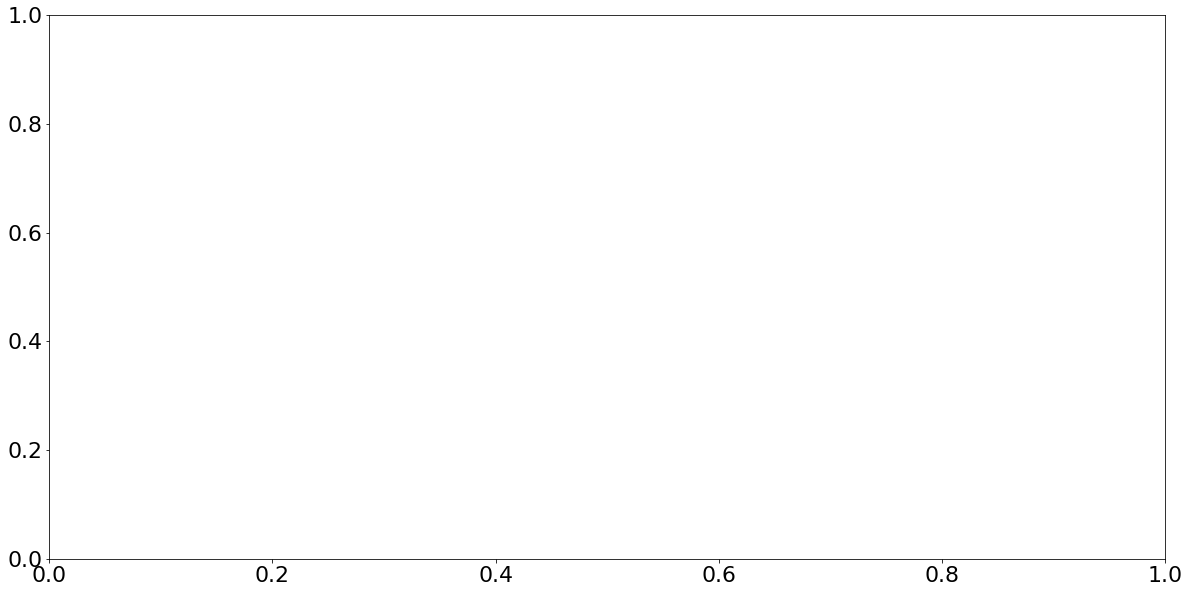

In [922]:
## temp
abox.index = range(len(abox))
fig,ax = plt.subplots(figsize=(20,10))
plt.rcParams.update({'font.size': 32})
valy = 'Diffusion/total'
classes = ['Mixed Sedimentary','Metamorphic / plutonic','Plutonic','Volcanic',
 'Mixed sed/volcanic','Unclassified','Ice cap','Melang/schist or tectonite belt']
r = abox['class']
if 0:
    abox['classnm'] = np.nan
    abox['classnm'][r == 146] = classes[0]
    abox['classnm'][r == 167] = classes[1]
    abox['classnm'][r == 252] = classes[2]
    abox['classnm'][r == 255] = classes[3]
    abox['classnm'][r == 96] = classes[4]
    abox['classnm'][r == 253] = classes[5]
    abox['classnm'][r == 176] = classes[6]
    abox['classnm'][r == 187] = classes[7]
#a['maxr2'] = dfs[np.argmax(r2s)][:len(a)] * np.exp(pcoef[np.argmax(r2s)])
#abox['classnm'] = r
property1 = 'Diffusion/total'
g2 = pd.DataFrame()
for i,g in abox.groupby('class'):
    g['rbin'] = pd.qcut(g['r2s'],[.95,1])
    g['rbin2'] = pd.qcut(g['r2s'],[.99999,1])
    g2 = g2.append(g)
    print(str(g['class'].iloc[0]) + ' ' + str(g.iloc[np.argmax(g['r2s'])]['Diffusion/total']))

g3 = g2[~g2['rbin2'].isna()]
g3[property1] = g3['classnm']
g3['r'+'2'.translate(superscript)] = g3['r2s']
g3['r²'] = np.round(g3['r²'],2)
g3['log(D/k)'] = np.log10(g3['D/k'])
#print(g3['n'])
ax2 =sns.violinplot(data=g3,x=property1,y=valy,c='Spectral')

cs = [sns.color_palette('Spectral').as_hex()[i] for i in [0,1,2,4,5]]

g3 = g2[~g2['rbin'].isna()]
g3['r'+'2'.translate(superscript)] = g3['r2s']
g3['r²'] = np.round(g3['r²'],2)
g3['log(D/k)'] = np.log10(g3['D/k'])
g2['log(D/k)'] = np.log10(g2['D/k'])
g3['n'] = g3['n']

g3[property1] = g3['classnm']
g3.index = range(len(g3))
if 'Precip' in property1:
    g3['Precip range (mm/yr)'] = ''
    for i in range(len(g3)):
        g3.loc[i,'Precip range (mm/yr)'] = str(int()) + ' - ' + str(int(g3.loc[i,property1].right))
    property1 = 'Precip range (mm/yr)'
sns.violinplot(data=g3,x=property1, y=valy,palette=cs)
#plt.yscale('log')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels('')
#plt.ylim([0,1.2])
#plt.ylim([0,1.2])
#plt.plot([.1,.1],[.2,.2])

Text(0, 0.5, 'n')

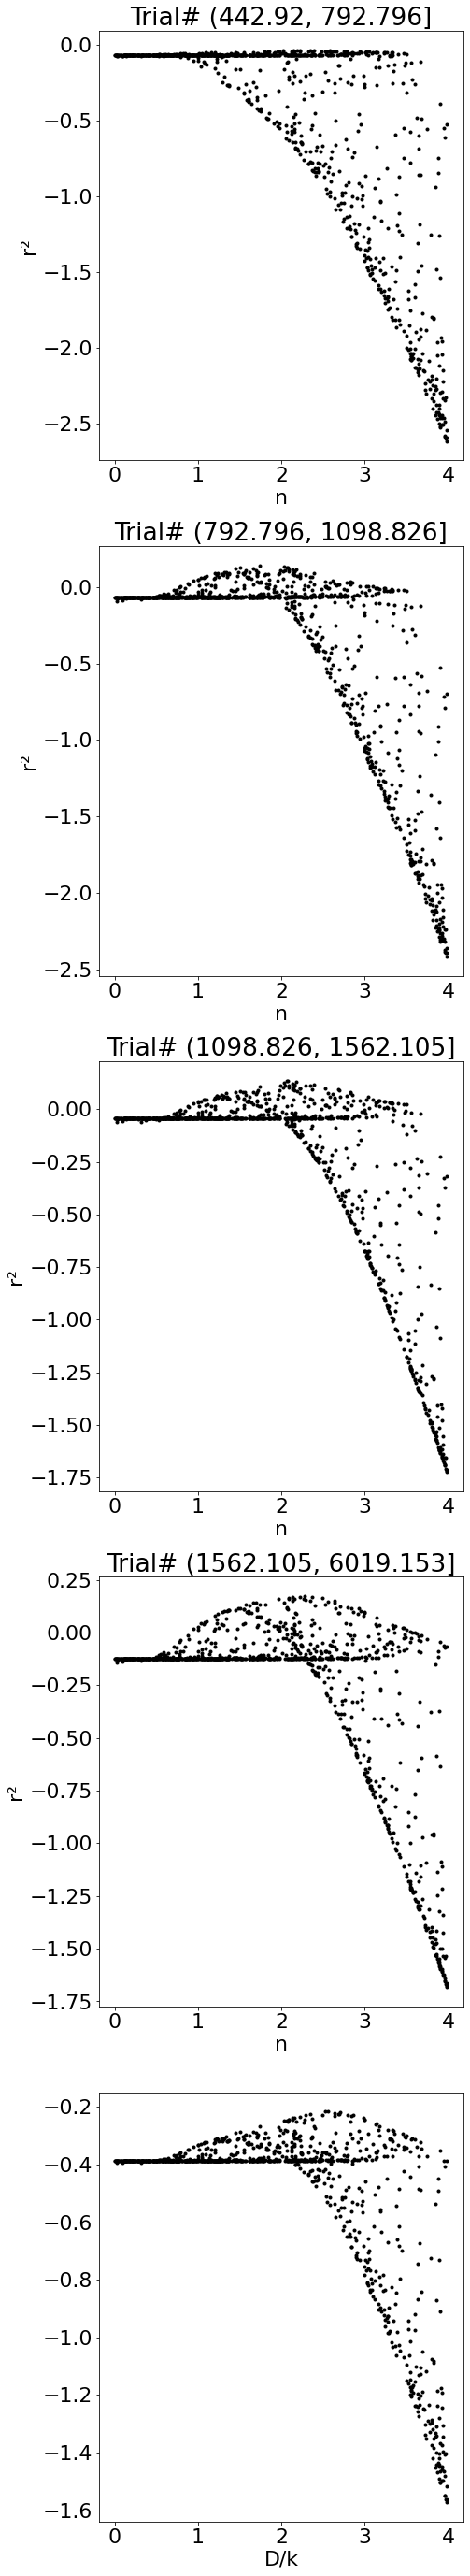

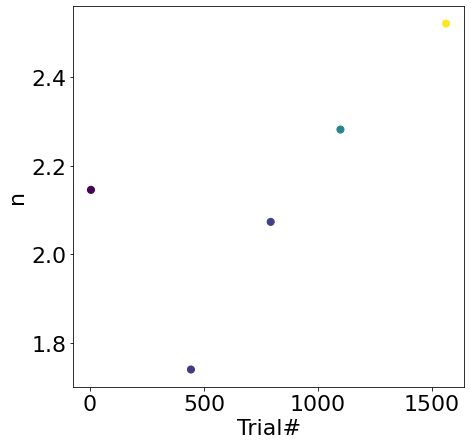

In [927]:
#plt.plot((ns),r2s[3],'.')
#plt.ylim((0,.5))
plt.rcParams.update({'font.size': 22})
fig,ax = plt.subplots(5,1,figsize=(7,7*7))

mt = a['meantempclass'].unique()
try:
    codes = mt.codes
except:
    codes = range(len(mt))#range(max(a['meantempclass']))

lo = np.zeros(len(codes))
r2max = np.zeros(len(codes))
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
lox = np.zeros(len(codes))
abox.index = abox['class']
varnm = 'n'
c = 0;
for i in range(len(codes)):
    if mt[codes[i]] is None:
        continue
    
    var = g2.loc[g2['class'] == mt[codes[i]]][varnm].to_numpy()
    #var.index = np.range(len(var))
    plt.sca(ax[c])
    try:
        lox[i] = mt[i].left

    except:
        try:
            lox[i] = codes[i]#codes[i][0].left#lens[i]
        except:
            continue
    plt.plot(var,r2s[i], '.k')
    #plt.ylim([.2, .7])
    lo[i] = var[np.argmax(r2s[i])]
    r2max[i] = np.max(r2s[i])
    plt.xlabel('D/k')
    #plt.xscale('log')
    try:
        #lith
        #plt.title(g2.loc[g2['class'] == mt[codes[i]]]['classnm'].iloc[0])
        #precip
        #plt.title('Precip = ' +str(mt[codes[i]]))
        #x - validation
        plt.title('Trial# ' +str(mt[codes[i]+1]))

    except:
        continue
    #plt.xlabel('E' + 'diffusion'.translate(subscript) + '/' 'E' + 'total'.translate(subscript))
    plt.xlabel(varnm)
    plt.ylabel('r'+'2'.translate(superscript))
    #plt.xlabel(t.loc[codes[i],'region'])
    c+=1
fig,ax = plt.subplots(figsize=(7,7))

# for i in range(len(a['meantempclass'].unique())):
#     fig,ax = plt.subplots(figsize=(7,7))
#     plt.hist(ns[r2s[l]>.3], kde=True)

plt.scatter(lox[r2max>-.3],lo[r2max>-.3],c=mntemp[r2max>-.3], s=50)
#plt.scatter(lo[r2max>.3],r2max[r2max>.3],c='k',s=50)

#plt.yscale('log')
plt.xlabel ('Trial#')
plt.ylabel (varnm)
#plt.ylabel('r' + '2'.translate(superscript))
#plt.ylim((0,4))
#plt.xscale('log')

In [ ]:
plt.plot(a['maxr2'][a['meantempclass']==13],a['ebe_mmkyr'][a['meantempclass'] == 13]/1000,'.')
plt.xscale('log')
plt.yscale('log')

<ipython-input-23-b1b1f11ebd84>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a1.geometry = a1.centroid
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


19

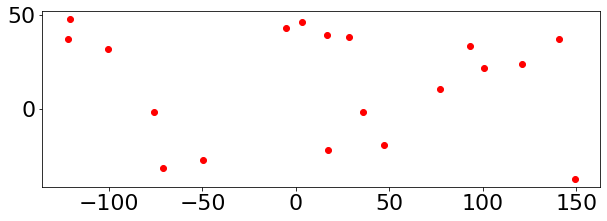

In [23]:
a1 = a[a['meantempclass'] == 1]
fig,ax = plt.subplots(figsize=(10,10))
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).plot(ax=ax,alpha=.5)
a1.geometry = a1.centroid
a1.plot(color='r',ax=ax)
len(a1)


In [1074]:
slps1 = slps2


<ipython-input-1075-e4a303034d1d>:7: RuntimeWarning: invalid value encountered in log
  y = np.log(np.float64(a['ebe_mmkyr'])/1000)
<ipython-input-1075-e4a303034d1d>:8: RuntimeWarning: divide by zero encountered in log
  x = np.log(slps1[:len(a)])


Text(0.00630957344480193, 0.005011872336272725, 'slope = 1.7 ')

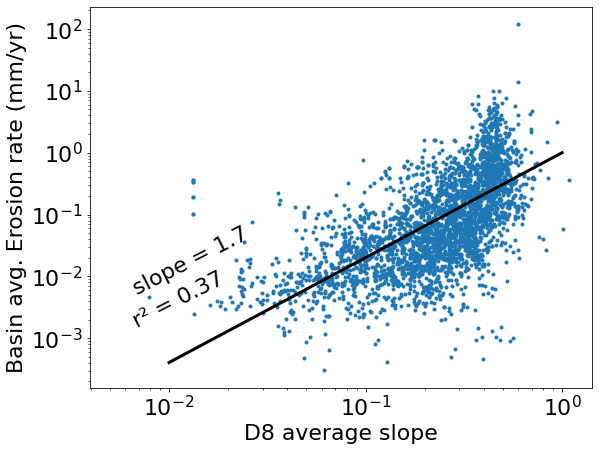

In [1075]:
plt.subplots(figsize=(9,7))
plt.plot(slps1[:len(a)], a['ebe_mmkyr']/1000,'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('D8 average slope')
plt.ylabel('Basin avg. Erosion rate (mm/yr)')
y = np.log(np.float64(a['ebe_mmkyr'])/1000)
x = np.log(slps1[:len(a)])
#I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
#x=x[I_min]
#y=y[I_min]
I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
x=np.delete(x,I)
y=np.delete(y,I)
I2 = np.where(np.logical_or(np.isnan(y),np.isinf(y)))[0]
x=np.delete(x,I2)
y=np.delete(y,I2)



l1  = lm.LinearRegression(fit_intercept=False)
l1 = l1.fit(x.reshape(-1,1),y.reshape(-1,1))
x2 = np.log(np.linspace(10**-2,10**0,100).reshape(-1,1))
y2 = l1.predict(x2)
plt.plot(np.exp(x2),np.exp(y2),'k',linewidth=3)
y3 = l1.predict((x.reshape(-1,1)))
r2 = sklearn.metrics.r2_score(y.reshape(-1,1),y3.reshape(-1,1))
plt.text(10**-2.2,10**-2.82,'r' +'2'.translate(superscript) + ' = {} '.format(str(np.round(r2,2))),rotation=27)
plt.text(10**-2.2,10**-2.3,'slope'+ ' = {} '.format(str(np.round(l1.coef_[0][0],1))),rotation=27)


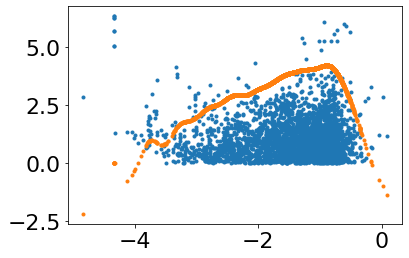

In [377]:
from numpy import array, linspace
from sklearn.neighbors import KernelDensity
from matplotlib.pyplot import plot
diff = np.abs(y3.reshape(-1,1)-y.reshape(-1,1))
lens = np.array(list(range(len(diff))))
kde = KernelDensity(kernel='gaussian', bandwidth=.1).fit(x.reshape([-1,1]),diff.reshape([-1,1]))
s = kde.score_samples(x.reshape(-1,1))
plt.plot(x,diff,'.')
plt.plot(x,s+4.5,'.')


In [1526]:
a['meantempclass'] = 0
a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.y>20,a.geometry.centroid.x<-50)]] = 2# East coast
a['meantempclass'][a.index[a.geometry.centroid.x<-90]] = 3# West coast
a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.x>100,a.geometry.centroid.y<0)]] = 4

<ipython-input-1526-54ac65292004>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.y>20,a.geometry.centroid.x<-50)]] = 2# East coast
<ipython-input-1526-54ac65292004>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.y>20,a.geometry.centroid.x<-50)]] = 2# East coast
<ipython-input-1526-54ac65292004>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['meantempclass'][a.index[np.logical_and(a.geometry.centr

In [ ]:
#a['binval'] = [a['meantempclass'][i].left for i in range(len(a))]

fig,ax = plt.subplots(figsize=(20,20))
b = a.copy()
b.geometry = b.geometry.centroid
b.plot(column='meantempclass',ax=ax,vmin=-1,vmax=20,cmap='jet', s = 1)

In [1023]:
l1 =[]
for i in range(len(dfs)):
    l1.append(len(dfs[i][dfs[i]>.00001]))
l1 = np.array(l1)

1.5705192050025845e-07

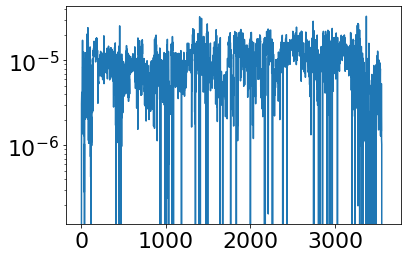

In [1001]:
plt.plot(dfs[100])
plt.yscale('log')
np.min(dfs[100][dfs[100]>0])

## I copied over parts of the diffusion notebook here

In [1117]:
folder = 'results/mn0_2'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
Gs = np.load('{}/Gs.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/ks.npy'.format(folder),allow_pickle=True)
careas = np.load('{}/careas.npy'.format(folder),allow_pickle=True)

In [1118]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
              
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs
dfs_d = dfs.copy()

In [1119]:
folder = 'results/r_mn05_6'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
Gs = np.load('{}/Gs.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/ks.npy'.format(folder),allow_pickle=True)
careas = np.load('{}/careas.npy'.format(folder),allow_pickle=True)

In [1120]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
drat = np.array([None]*len(eros1[1]))
            
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        drat[i] = np.zeros(len(eros1))

        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i] #- dfs_d[0][k]* diffus[i]/.01
                #dfs[i][k] = dfs[i][k] + dfs_d[0][k]*200
                drat[i][k] = (dfs_d[0][k] * diffus[i] / .01 ) / eros1[k][i] 
            c+=1
    #return dfs


<ipython-input-1120-00be126957c4>:19: RuntimeWarning: invalid value encountered in double_scalars
  drat[i][k] = (dfs_d[0][k] * diffus[i] / .01 ) / eros1[k][i]


In [1121]:
from sklearn import linear_model as lm
import sklearn
r2s = np.zeros(len(eros1[1]))
resid = np.zeros(len(eros1[1]))
pcoef = np.zeros(len(eros1[1]))
dratave = np.zeros(len(eros1[1]))

ks2 = ns.copy()#ks.copy()
diffus2 = diffus.copy()
badn = []
for i in range(len(eros1[1])):#range(len(ms)):
        if dfs[i] is None:
            continue
        
        y = np.log(np.float64(a['ebe_mmkyr'])/1000)
        x = np.log(dfs[i][:len(a)])
        #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
        #x=x[I_min]
        #y=y[I_min]
        xi = x.copy()
        I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
        x=np.delete(x,I)
        y=np.delete(y,I)
        I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
        x = np.delete(x,I2)
        y = np.delete(y,I2)
        l1  = lm.LinearRegression(fit_intercept=False)
        l = lm.LinearRegression(fit_intercept=False)
        if len(x[np.logical_not(np.isnan(x))])>n-3000:
                #print(len(x[np.logical_not(np.isnan(x))]))
                
                p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                p = l.fit(x.reshape(-1,1), y.reshape(-1,1 ))

                intercept =np.mean(y-x)
                y2 = x+intercept
                #y2 = p.predict(x.reshape(-1,1))
                y3 = np.exp(x) * p1.coef_#p1.predict(np.exp(x.reshape(-1,1)))
                try:
                    r2s[i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)

                except:
                    print('here')
                diffus2[i] *= p1.coef_
                ks2[i] *= p1.coef_
                resid[i] = -np.sum(np.power(y.ravel()-np.log(y3.ravel()),2))
                #print(len(y[np.logical_not(np.isnan(x))]))
                pcoef[i] = p1.intercept_
                dratave[i] = np.mean(drat[i][np.logical_and(drat[i]>0, np.abs(drat[i]) < 1e10 )])
               # if resid[i]>127.9:
                #    break
        else:
            print(i)
            badn.append(diffus[i])
            


<ipython-input-1121-7112be0e8324>:15: RuntimeWarning: invalid value encountered in log
  y = np.log(np.float64(a['ebe_mmkyr'])/1000)
<ipython-input-1121-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1121-7112be0e8324>:15: RuntimeWarning: invalid value encountered in log
  y = np.log(np.float64(a['ebe_mmkyr'])/1000)
<ipython-input-1121-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1121-7112be0e8324>:15: RuntimeWarning: invalid value encountered in log
  y = np.log(np.float64(a['ebe_mmkyr'])/1000)
<ipython-input-1121-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-1121-7112be0e8324>:15: RuntimeWarning: invalid value encountered in log
  y = np.log(np.float64(a['ebe_mmkyr'])/1000)
<ipython-input-1121-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a

In [1123]:
dratave

array([0.88414671, 0.99992689, 0.48187416, 1.00001566, 0.18210218,
       0.27925561, 1.00002561, 0.99999344, 0.45389474, 0.99819242,
       0.99725612, 1.00002818, 0.02583342, 0.99983232, 0.30702673,
       1.00002776, 1.00002831, 0.99971295, 0.00858622, 0.99788582,
       0.99995941, 0.91034754, 0.01062335, 0.99995835, 0.00882494,
       0.99539977, 1.00001263, 1.00002822, 0.35578546, 0.0799941 ,
       0.99993487, 0.91627662, 0.00553658, 1.00002636, 1.00002836,
       0.10038135, 0.96287675, 0.1719536 , 0.00873137, 1.00002811,
       0.12376044, 1.00002835, 0.99996385, 0.03166676, 1.00002835,
       0.90603261, 0.04279587, 0.71370123, 1.00002212, 0.61328433,
       1.00002711, 0.1709509 , 0.16436414, 0.99999099, 0.99999984,
       0.99915159, 0.0127272 , 0.00699237, 0.00989154, 0.27475558,
       0.99988671, 0.99886154, 0.00807961, 0.99463655, 1.00002833,
       1.00001511, 0.49190067, 0.82447828, 1.00002724, 0.0066339 ,
       1.00001181, 0.90219901, 0.80762403, 0.24910398, 0.99994

In [417]:
np.mean(dratave)

0.6247337123288612

(0.3, 0.5)

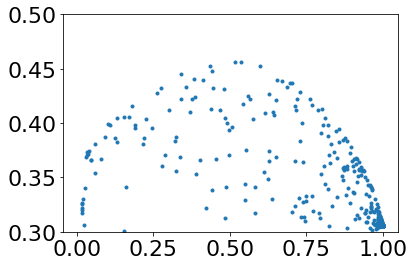

In [414]:
plt.plot(dratave,r2s,'.')
plt.ylim([.3,.5])

In [386]:
1/3.9

0.25641025641025644

In [526]:
#plt.plot((ns),r2s[3],'.')
#plt.ylim((0,.5))
plt.rcParams.update({'font.size': 22})

superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
mt = a['meantempclass'].unique()
codes = mt.codes
lo = np.zeros(len(codes))
var = dratave


lox = np.zeros(len(codes))
for i in range(len(codes)):
    lox[codes[i]] = mt[codes[i]].left
    fig,ax = plt.subplots(figsize=(10,7))
    plt.plot(var,r2s[codes[i]], '.k')
    plt.ylim([.2, .65])
    lo[codes[i]] = var[np.argmax(r2s[codes[i]])]
    plt.xlabel('E'+'diffusive'.translate(subscript)+' / E'+'total'.translate(subscript))
    #plt.xscale('log')
    plt.title('Range = ' + str(mt[codes[i]]))

fig,ax = plt.subplots(figsize=(10,7))

# for i in range(len(a['meantempclass'].unique())):
#     fig,ax = plt.subplots(figsize=(7,7))
#     plt.hist(ns[r2s[l]>.3], kde=True)

plt.plot(lox,lo,'k.-',linewidth=2,markersize=30)
plt.ylabel('E'+'diffusive'.translate(subscript)+' / E'+'total'.translate(subscript))
plt.xlabel ('Mean Annual Precipitation (mm/yr)')
#plt.yscale('log')


KeyError: 'meantempclass'

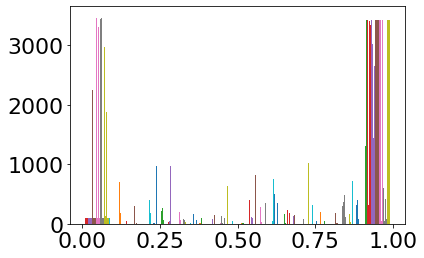

## Geologic 

In [199]:
from rasterstats import zonal_stats as zn
import rasterio as rio

In [282]:
geo = zn(a,'/Volumes/Samsung_T5/geo4.tif',stats=['majority','min','max','mean'])
major = [geo[i]['majority'] for i in range(len(geo))]
means = [geo[i]['mean'] for i in range(len(geo))]
mins = [geo[i]['min'] for i in range(len(geo))]

/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [283]:
np.save('geo_major.npy', major)

In [284]:
a['meantempclass'] = major
#a['meantempclass'] 

3553

In [203]:
sns.color_palette("tab10").as_hex()[0]

'#1f77b4'

<ipython-input-204-84c3268153e3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['geo'][a['geo'] == 146] = 1
<ipython-input-204-84c3268153e3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['geo'][a['geo'] == 96] = 0
<ipython-input-204-84c3268153e3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['geo'][a['geo'] == 167] = 2
<ipython-input-204-84c3268153e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

<AxesSubplot:>

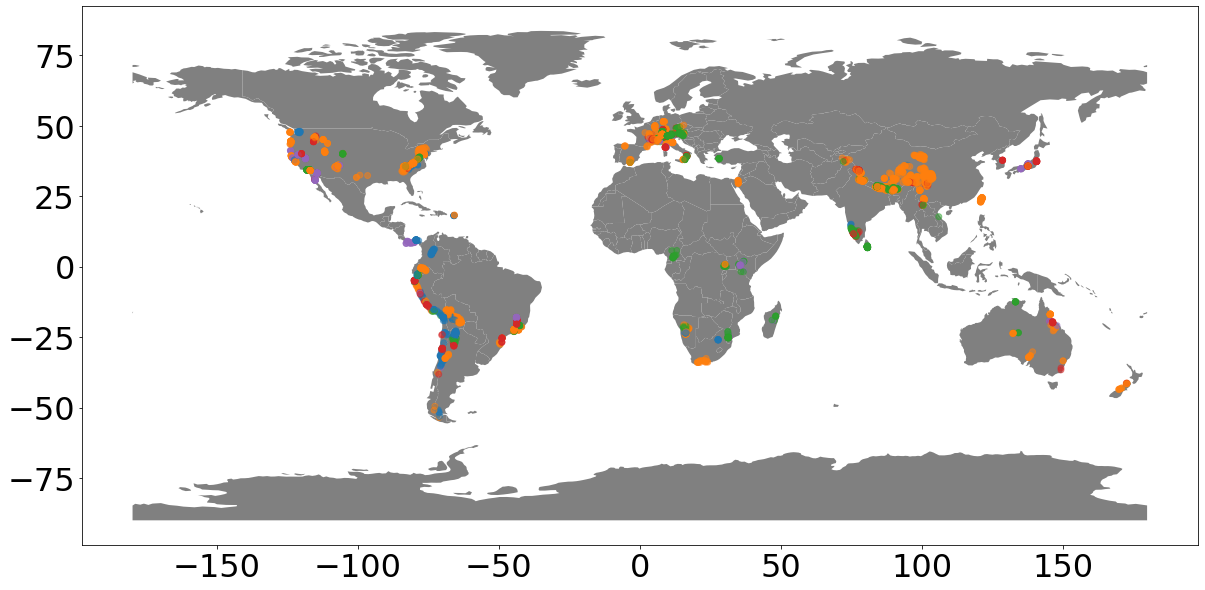

In [204]:
from matplotlib.colors import ListedColormap

fig,ax = plt.subplots(figsize=(20,10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax,color='grey')
a['geo'] = major

a['geo'][a['geo'] == 146] = 1
a['geo'][a['geo'] == 96] = 0 
a['geo'][a['geo'] == 167] = 2
a['geo'][a['geo'] == 252] = 3
a['geo'][a['geo'] == 255] = 4

a2 = a.copy()
a2.geometry = a.geometry.centroid


a2.plot('geo',ax = ax,cmap = ListedColormap(sns.color_palette("tab10").as_hex()[:5]),vmin=0, vmax=5,alpha=.5)
#plt.imshow(f)

In [211]:
len(np.logical_and(a['geo']>0 and a['geo'] < 5))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [1598]:
f = rio.open('
             /geology.tif')
r = f.read()
r2 = r.copy()

In [1599]:


geovals = [146,167,252,255,96,253,176,187]



In [1600]:
ageo = gpd.GeoDataFrame(geometry=a['geometry'])

In [1688]:
ageo['geo'] = a['geo']

In [1689]:
ageo.to_file('geo_test')

In [ ]:
test['Short-term erosion rate (mm kyr^-1)']

In [699]:
test = pd.read_csv('/Users/gr_1/Downloads/Chen_et_al_2021_short-term_erosion_rate_data.csv')

In [705]:
test['log(short-term erosion rate (mm kyr-1))'] = np.log10(test['Short-term erosion rate (mm kyr^-1)'])

In [ ]:
test['log(short-term erosion rate (mm kyr-1))']

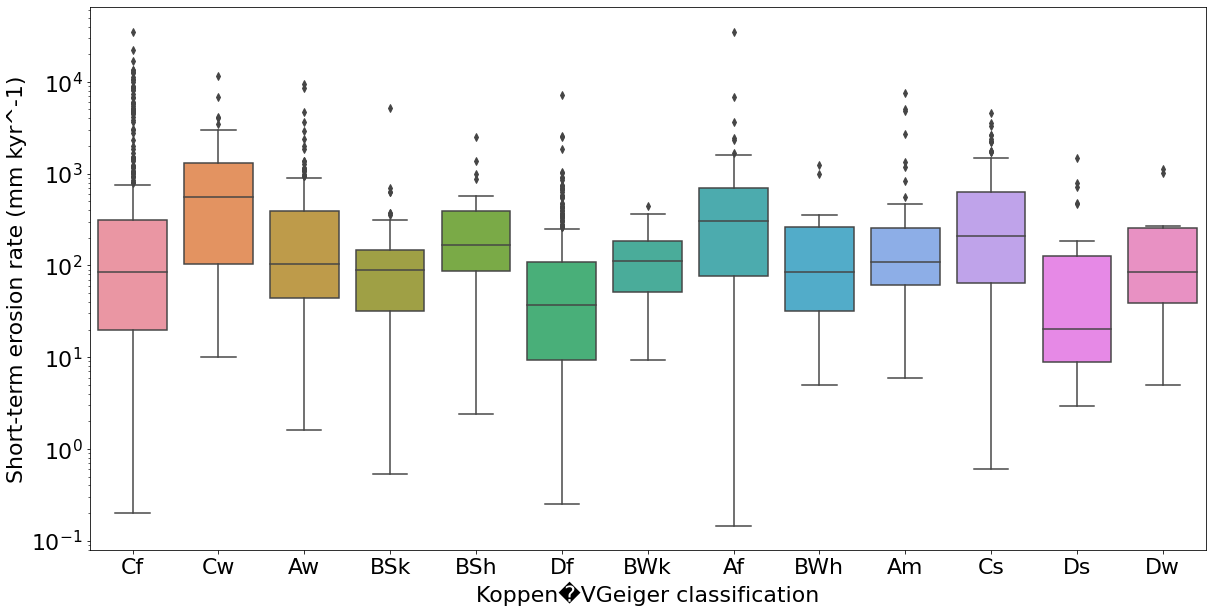

In [706]:
plt.subplots(figsize=(20,10))

sns.boxplot(data=test,x='Koppen�VGeiger classification',y='Short-term erosion rate (mm kyr^-1)')
plt.yscale('log')

AttributeError: module 'seaborn' has no attribute 'qqplot'

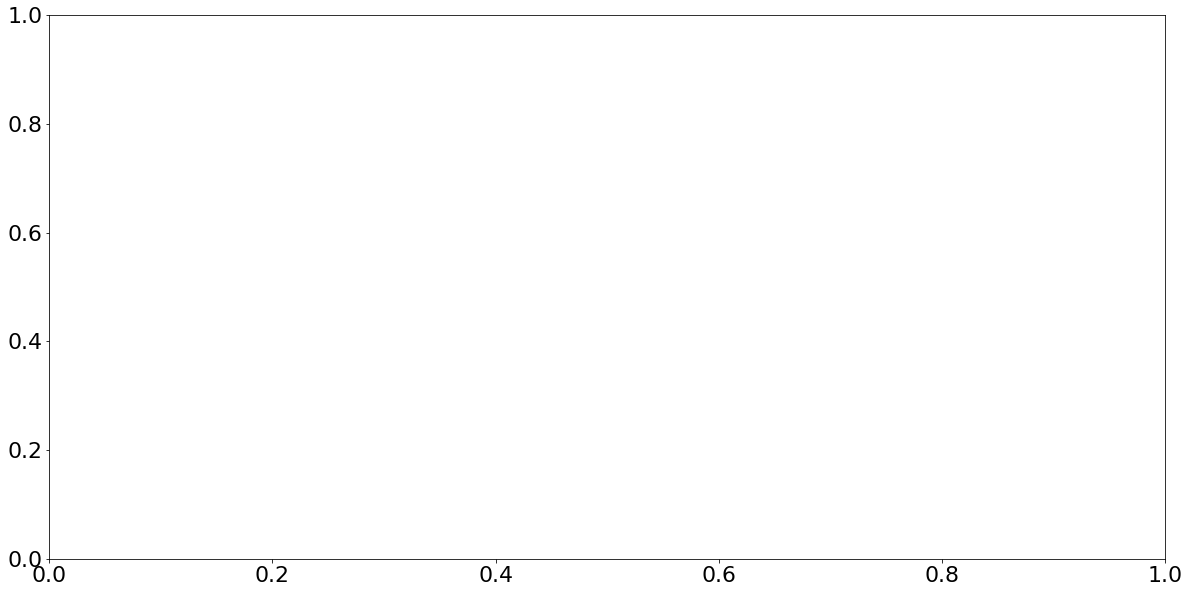

In [774]:
plt.subplots(figsize=(20,10))

sns.qq(data=test,x='Koppen�VGeiger classification',y='log(short-term erosion rate (mm kyr-1))')


In [783]:
from statsmodels.graphics.gofplots import qqplot_2samples

<AxesSubplot:xlabel='log(short-term erosion rate (mm kyr-1))', ylabel='Count'>

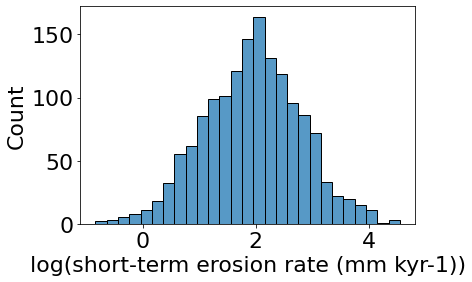

In [708]:
sns.histplot(data=test,x='log(short-term erosion rate (mm kyr-1))')

In [801]:
from scipy.stats import kruskal as ks

In [818]:
g1 = []
g2 = []
for i,g in test.groupby('Koppen�VGeiger classification'):
    g1.append(g['Short-term erosion rate (mm kyr^-1)'])
    g2.append(g['log(short-term erosion rate (mm kyr-1))'])

In [819]:
p = np.zeros((len(g1),len(g1)))
for i in range(len(g1)):
    for j in range(i,len(g1)):
        p[i,j] = ks(g1[j],g1[i]).pvalue

In [815]:
g1 = []
for i in range(10):
    subset = test.sample(10)
    g1.append(subset['Short-term erosion rate (mm kyr^-1)'])

([<matplotlib.axis.YTick at 0x1b5a0e580>,
 [Text(0, 0, 'Cf'),
  Text(0, 1, 'Cw'),
  Text(0, 2, 'Aw'),
  Text(0, 3, 'BSk'),
  Text(0, 4, 'BSh'),
  Text(0, 5, 'Df'),
  Text(0, 6, 'BWk'),
  Text(0, 7, 'Af'),
  Text(0, 8, 'BWh'),
  Text(0, 9, 'Am'),
  Text(0, 10, 'Cs'),
  Text(0, 11, 'Ds'),
  Text(0, 12, 'Dw')])

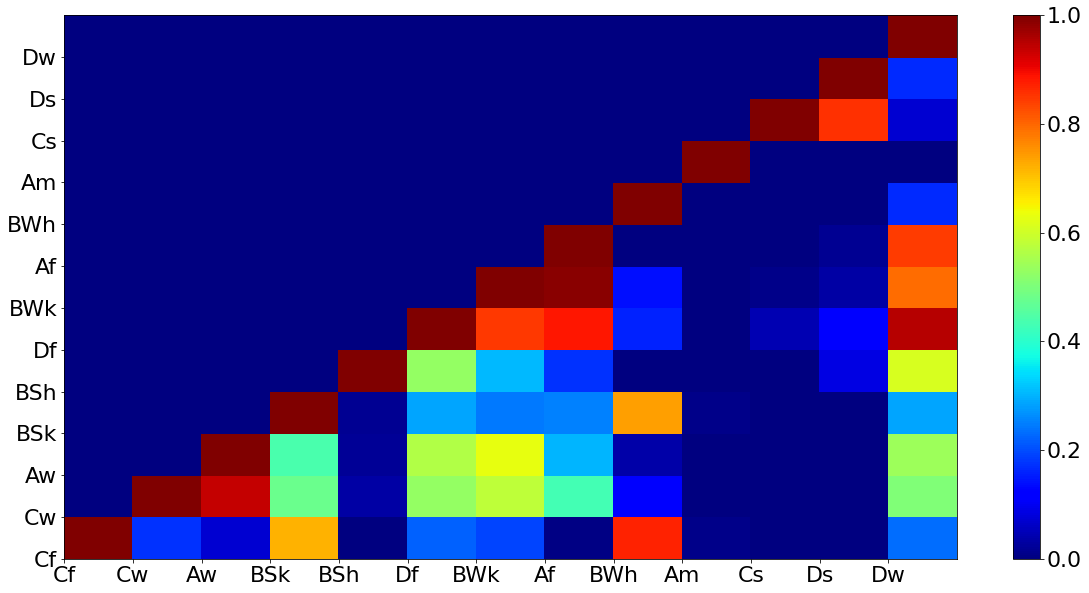

In [773]:
plt.subplots(figsize=(20,10))
plt.pcolor(p,vmin=0,vmax=1,cmap='jet')
plt.colorbar()
plt.xticks(ticks=list(range(len(g2))),labels=test['Koppen�VGeiger classification'].unique())
plt.yticks(ticks=list(range(len(g2))),labels=test['Koppen�VGeiger classification'].unique())